In [140]:
import os
from os import walk

import pandas as pd
import sys
import re
import numpy as np
import re

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 1500)
pd.set_option('max_colwidth', 400)

# Typing Results:

In [94]:
resultpath = 'C:\\Users\\nikol\\Desktop\\Result_parsing\\6_oktober_20_results'

## Kourami

In [95]:
kourami_result_filepath = resultpath + '\\kourami\\'

kourami_files = []
for (dirpath, dirnames, filenames) in walk(kourami_result_filepath):
    kourami_files.extend(filenames)
    
#print(kourami_files)

kourami_results = dict()

for filename in kourami_files:
    temp_results = list(pd.read_csv(kourami_result_filepath + filename, header = None, sep='\t')[0])

    kourami_results[filename[:-4]] = [i.split('*')[0] + '*' + i.split('*')[1][0:5] for i in temp_results if i.split('*')[0] in ['A','B','C','DQB1','DRB1']]
    
    
    
#kourami_results

## HLA-LA

In [96]:
hla_la_result_filepath = resultpath + '\\hla-la\\'

hla_la_files = []
for (dirpath, dirnames, filenames) in walk(hla_la_result_filepath):
    hla_la_files.extend(filenames)
    
#print(hla_la_files)


hla_la_results = dict()

for filename in hla_la_files:
    temp_results_0 = pd.read_csv(hla_la_result_filepath + filename, sep = "\t")['Allele']
    temp_results = [i for i in temp_results_0 if i.startswith(('A', 'B', 'C', 'DQB1','DRB1'))]
    
    hla_la_results[filename[:-4]] = [i.split('*')[0] + '*' + i.split('*')[1][0:5] for i in temp_results]
    
    
#hla_la_results

## Optitype

In [97]:
optitype_result_filepath = resultpath + '\\optitype\\'

optitype_files = []
for (dirpath, dirnames, filenames) in walk(optitype_result_filepath):
    optitype_files.extend(filenames)
    
#print(optitype_files)


optitype_results = dict()

for filename in optitype_files:
    temp_results = list(pd.read_csv(optitype_result_filepath + filename, sep = "\t").iloc[0])[1:7]
    
    temp_results_filtered = [i for i in temp_results if isinstance(i,str)]
    optitype_results[filename[:-4]] = [i.split('*')[0] + '*' + i.split('*')[1][0:5] for i in temp_results_filtered]
       
#optitype_results

## Hisatgenotype

In [98]:
hisatgenotype_result_filepath = resultpath + '\\hisatgenotype\\'

hisatgenotype_files = []
for (dirpath, dirnames, filenames) in walk(hisatgenotype_result_filepath):
    hisatgenotype_files.extend(filenames)
    
#print(hisatgenotype_files)


hisatgenotype_results = dict()

for filename in hisatgenotype_files:
    
    hisatgenotype_resultlist = list()
    with open(hisatgenotype_result_filepath + filename) as infile:
        for line in infile:
            result = re.match(r'^\t+(1|2)\sranked (A|B|C|DQB1|DRB1)',line)

            if result is not None:
                #print(line)
                hisatgenotype_resultlist.append(line.split()[2])
            
        
        #Duplicate prediction for an allele in case of homologous case, so that each gene has two predictions.
        for allele in ['A', 'B', 'C', 'DQB1', 'DRB1']:
            allele_list = [pred for pred in hisatgenotype_resultlist if pred.startswith(allele)]
            
            if len(allele_list) == 1:
                hisatgenotype_resultlist.append(allele_list[0])
                hisatgenotype_resultlist.sort()

    hisatgenotype_results[filename[:-4]] = [i.split('*')[0] + '*' + i.split('*')[1][0:5] for i in hisatgenotype_resultlist]
    

hisatgenotype_results           
        

{'HG00096': ['A*01:01',
  'A*29:02',
  'B*08:01',
  'B*44:03',
  'C*16:01',
  'C*07:01',
  'DRB1*03:01',
  'DRB1*07:01',
  'DQB1*02:02',
  'DQB1*02:01'],
 'HG00129': ['A*01:01',
  'A*01:01',
  'B*13:02',
  'B*35:01',
  'C*04:01',
  'C*04:01',
  'DRB1*01:01',
  'DRB1*07:01',
  'DQB1*02:02',
  'DQB1*05:01'],
 'HG00176': ['A*01:21',
  'A*01:01',
  'B*15:20',
  'B*35:43',
  'C*04:01',
  'C*03:03',
  'DRB1*04:01',
  'DRB1*13:01',
  'DQB1*06:03',
  'DQB1*03:02'],
 'HG00310': ['A*03:01',
  'A*03:21',
  'B*07:02',
  'B*15:01',
  'C*07:02',
  'C*03:03',
  'DRB1*15:01',
  'DRB1*13:01',
  'DQB1*06:03',
  'DQB1*06:11'],
 'HG00380': ['A*03:01',
  'A*03:22',
  'B*07:02',
  'B*08:12',
  'C*07:01',
  'C*03:04',
  'DRB1*01:01',
  'DRB1*13:01',
  'DQB1*06:03',
  'DQB1*05:01'],
 'HG00692': ['A*02:60',
  'A*11:01',
  'B*46:01',
  'B*15:01',
  'C*07:02',
  'C*01:02',
  'DRB1*04:04',
  'DRB1*11:01',
  'DQB1*03:02',
  'DQB1*03:16'],
 'HG01341': ['A*66:01',
  'A*02:04',
  'B*49:01',
  'B*51:01',
  'C*15:02',


## STC-seq

In [99]:
def flatten(a):
    return [item for sublist in a for item in sublist]

In [100]:
stc_seq_result_filepath = resultpath + '\\stc-seq\\'

stc_seq_files = []
for (dirpath, dirnames, filenames) in walk(stc_seq_result_filepath):
    stc_seq_files.extend(filenames)
    
#print(stc_seq_files)

stc_seq_results = dict()

for filename in stc_seq_files:
    stc_df = pd.read_csv(stc_seq_result_filepath + filename, sep = "\t").reset_index()
    stc_df.columns = stc_df.iloc[0]
    stc_list = list(stc_df[stc_df['Locus'].isin(['A', 'B', 'C', 'DQB1','DRB1'])]['Genotype'])
    
    temp_results =  flatten([i.split(',') for i in stc_list])
    
    stc_seq_results[filename[:-4]] = [i.split('*')[0] + '*' + i.split('*')[1][0:5] for i in temp_results if i.split('*')[0] in ['A','B','C','DQB1','DRB1']]


#stc_seq_results

# Load Gold standard (## 1000Genomes)

In [101]:
#Old file:

# milleg_filepath='C:\\Users\\nikol\\Desktop\\Result_parsing\\1000G_hla_diversity.txt'
# milleg_final_filepath='C:\\Users\\nikol\\Desktop\\Result_parsing\\1000G_hla_diversity_edited.txt'

# #Remove weird quotes from file:
# with open(milleg_filepath, 'r') as infile:
#     newfile = ""
#     for line in infile:
#         newline = line.replace("\"", "")
#         newfile += newline

# outfile = open(milleg_edited_filepath, 'w')
# outfile.write(newfile)
# outfile.close()

#New file (2018 version, w corrections)

milleg_final_filepath='C:\\Users\\nikol\\Desktop\\Result_parsing\\2018_1129_HLA_types_full_1000_Genomes_Project_panel.txt'


In [163]:
mille_gs_df = pd.read_csv(milleg_final_filepath, sep = "\t")
#mille_gs_df

#Change name of Utah individuals from CEPH to CEU as seen in the 1000 genomes database:
#mille_gs_df.replace('CEPH','CEU', inplace=True)

#Rename columns
mille_gs_df.rename(columns={'Sample ID': 'id', 'Population': 'sbgroup', 'HLA-A 1': 'A', 'HLA-A 2': 'A.1', 'HLA-B 1': 'B',
                            'HLA-B 2': 'B.1', 'HLA-C 1': 'C', 'HLA-C 2': 'C.1', 'HLA-DQB1 1': 'DQB1', 'HLA-DQB1 2': 'DQB1.1',
                            'HLA-DRB1 1': 'DRB1' , 'HLA-DRB1 2': 'DRB1.1' }, inplace=True)

#Remove samples with NaN (non typed alleles)
mille_gs_df.dropna(inplace=True)          
#Print number of subgroups in the dataset:
#mille_gs_df['sbgroup'].unique()



In [164]:
mille_gs_df

Region sbgroup       id                               A  \
0       AFR     ACB  HG01879                           23:01   
1       AFR     ACB  HG01880                           33:03   
2       AFR     ACB  HG01882                           23:01   
3       AFR     ACB  HG01883                           02:01   
4       AFR     ACB  HG01885                           03:01   
5       AFR     ACB  HG01886                           30:02   
6       AFR     ACB  HG01889                           30:01   
7       AFR     ACB  HG01890                           01:01   
8       AFR     ACB  HG01894                           23:01   
9       AFR     ACB  HG01896                           23:01   
10      AFR     ACB  HG01912                           02:01   
11      AFR     ACB  HG01914                           34:02   
12      AFR     ACB  HG01915                           66:01   
13      AFR     ACB  HG01956                           30:01   
14      AFR     ACB  HG01958                           02:01   
15      AFR     ACB  HG01985                           23:01   
16      AFR     ACB  HG01986                           36:01   
17      AFR     ACB  HG01988                           02:01   
18      AFR     ACB  HG01989                           34:02   
19      AFR     ACB  HG01990                           29:02   
20      AFR     ACB  HG02009                           31:01   
21      AFR     ACB  HG02010                           03:01   
22      AFR     ACB  HG02012                           23:01   
23      AFR     ACB  HG02013                           23:01   
24      AFR     ACB  HG02014                           02:01   
25      AFR     ACB  HG02051                           74:01   
26      AFR     ACB  HG02052                           02:05   
27      AFR     ACB  HG02053                           30:01   
28      AFR     ACB  HG02054                           23:01   
29      AFR     ACB  HG02095                           66:01   
30      AFR     ACB  HG02107                           02:01   
31      AFR     ACB  HG02108                           23:17   
32      AFR     ACB  HG02111                           02:05   
33      AFR     ACB  HG02143                           01:01   
34      AFR     ACB  HG02144                           24:02   
35      AFR     ACB  HG02255                           03:01   
36      AFR     ACB  HG02256                           24:02   
37      AFR     ACB  HG02281                           23:17   
38      AFR     ACB  HG02282                           03:01   
39      AFR     ACB  HG02283                           23:01   
40      AFR     ACB  HG02284                           01:01   
41      AFR     ACB  HG02307                           30:01   
42      AFR     ACB  HG02308                           30:02   
43      AFR     ACB  HG02309                           34:02   
44      AFR     ACB  HG02314                           34:02   
45      AFR     ACB  HG02315                           34:02   
46      AFR     ACB  HG02317                           03:01   
47      AFR     ACB  HG02318                     02:01/06/30   
48      AFR     ACB  HG02322                           02:05   
49      AFR     ACB  HG02323                           32:01   
50      AFR     ACB  HG02325                           03:01   
51      AFR     ACB  HG02330                           30:02   
52      AFR     ACB  HG02332                           23:01   
53      AFR     ACB  HG02334                           02:01   
54      AFR     ACB  HG02337                           68:02   
55      AFR     ACB  HG02339                           02:01   
56      AFR     ACB  HG02343                           03:01   
57      AFR     ACB  HG02419                           33:03   
58      AFR     ACB  HG02420                           26:01   
59      AFR     ACB  HG02427                           23:17   
60      AFR     ACB  HG02429                           01:01   
61      AFR     ACB  HG02433         

### Remove samples, which doesn't have exome data on 1000Genomes and create download links

In [108]:
import http.client
from urllib.parse import urlparse

def checkUrl(url):
    p = urlparse(url)
    conn = http.client.HTTPConnection(p.netloc)
    conn.request('HEAD', p.path)
    resp = conn.getresponse()
    return resp.status < 400

# if __name__ == '__main__':
#     print(checkUrl('http://www.stackoverflow.com')) # True
#     print(checkUrl('http://stackoverflow.com/notarealpage.html')) # False

In [165]:
#Thre results of this code are saved in two files, to save time

#Check all exome links to create a list of id's with exome data
valid_wes_id_list = list()

#Save the valid urls for download later
wget_url_list = list()

i = 0

for identity in list(mille_gs_df['id']):
    i += 1
    if i % 100 == 0:
        print(i)
        
    sbgroup = mille_gs_df[mille_gs_df['id'] == identity]['sbgroup'].iloc[0]         
    wget_url = "ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000_genomes_project/data/{}/{}/exome_alignment/{}.alt_bwamem_GRCh38DH.20150826.{}.exome.cram".format(sbgroup, identity, identity, sbgroup, )
    
    if checkUrl(wget_url):
        valid_wes_id_list.append(identity)
        wget_url_list.append(wget_url)

with open('C:\\Users\\nikol\\Desktop\\Result_parsing\\wget_url_list.txt', 'w') as outfile:
    for entry in wget_url_list:
        outfile.write(entry + '\n')
    
with open('C:\\Users\\nikol\\Desktop\\Result_parsing\\valid_wes_id_list.txt', 'w') as outfile:
    for entry in valid_wes_id_list:
        outfile.write(entry + '\n')

wget_url_list = list()
with open('C:\\Users\\nikol\\Desktop\\Result_parsing\\wget_url_list.txt', 'r') as infile:
    for line in infile:
        wget_url_list.append(line[:-1])   

valid_wes_id_list= list()
with open('C:\\Users\\nikol\\Desktop\\Result_parsing\\valid_wes_id_list.txt', 'r') as infile:
    for line in infile:
        valid_wes_id_list.append(line[:-1])   

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300


In [167]:
MG_exome_df = mille_gs_df[mille_gs_df['id'].isin(valid_wes_id_list)]

#Replace 0000 with empty string:
#MG_exome_df = MG_exome_df.replace('0000', '')

#MG_exome_df

In [168]:
MG_exome_df

Region sbgroup       id                               A  \
0       AFR     ACB  HG01879                           23:01   
1       AFR     ACB  HG01880                           33:03   
2       AFR     ACB  HG01882                           23:01   
3       AFR     ACB  HG01883                           02:01   
4       AFR     ACB  HG01885                           03:01   
5       AFR     ACB  HG01886                           30:02   
6       AFR     ACB  HG01889                           30:01   
7       AFR     ACB  HG01890                           01:01   
8       AFR     ACB  HG01894                           23:01   
9       AFR     ACB  HG01896                           23:01   
10      AFR     ACB  HG01912                           02:01   
11      AFR     ACB  HG01914                           34:02   
12      AFR     ACB  HG01915                           66:01   
13      AFR     ACB  HG01956                           30:01   
14      AFR     ACB  HG01958                           02:01   
15      AFR     ACB  HG01985                           23:01   
16      AFR     ACB  HG01986                           36:01   
17      AFR     ACB  HG01988                           02:01   
18      AFR     ACB  HG01989                           34:02   
19      AFR     ACB  HG01990                           29:02   
20      AFR     ACB  HG02009                           31:01   
21      AFR     ACB  HG02010                           03:01   
22      AFR     ACB  HG02012                           23:01   
23      AFR     ACB  HG02013                           23:01   
24      AFR     ACB  HG02014                           02:01   
25      AFR     ACB  HG02051                           74:01   
26      AFR     ACB  HG02052                           02:05   
27      AFR     ACB  HG02053                           30:01   
28      AFR     ACB  HG02054                           23:01   
29      AFR     ACB  HG02095                           66:01   
30      AFR     ACB  HG02107                           02:01   
31      AFR     ACB  HG02108                           23:17   
32      AFR     ACB  HG02111                           02:05   
33      AFR     ACB  HG02143                           01:01   
34      AFR     ACB  HG02144                           24:02   
35      AFR     ACB  HG02255                           03:01   
36      AFR     ACB  HG02256                           24:02   
37      AFR     ACB  HG02281                           23:17   
38      AFR     ACB  HG02282                           03:01   
39      AFR     ACB  HG02283                           23:01   
40      AFR     ACB  HG02284                           01:01   
41      AFR     ACB  HG02307                           30:01   
42      AFR     ACB  HG02308                           30:02   
43      AFR     ACB  HG02309                           34:02   
44      AFR     ACB  HG02314                           34:02   
45      AFR     ACB  HG02315                           34:02   
46      AFR     ACB  HG02317                           03:01   
47      AFR     ACB  HG02318                     02:01/06/30   
48      AFR     ACB  HG02322                           02:05   
49      AFR     ACB  HG02323                           32:01   
50      AFR     ACB  HG02325                           03:01   
51      AFR     ACB  HG02330                           30:02   
52      AFR     ACB  HG02332                           23:01   
53      AFR     ACB  HG02334                           02:01   
54      AFR     ACB  HG02337                           68:02   
55      AFR     ACB  HG02339                           02:01   
56      AFR     ACB  HG02343                           03:01   
57      AFR     ACB  HG02419                           33:03   
58      AFR     ACB  HG02420                           26:01   
59      AFR     ACB  HG02427                           23:17   
60      AFR     ACB  HG02429                           01:01   
61      AFR     ACB  HG02433         

### Double Typing
Merge rows, where a person has been typed twice. (this was only relevant for 2014 data)

In [128]:
#Check for non-identical rows
# print(len(set(list(MG_exome_df['id']))))
# print(len(list(MG_exome_df['id'])))

In [129]:
# non_unique = list({x for x in list(MG_exome_df['id']) if list(MG_exome_df['id']).count(x) > 1})
# non_unique_df = MG_exome_df[MG_exome_df['id'].isin(non_unique)]
# non_unique_df

In [130]:
# clean_duplicates_df = pd.DataFrame()
# for column in ['A','A.1','B','B.1','C','C.1','DRB1','DRB1.1','DQB1','DQB1.1']:
#     clean_duplicates_df[column] = non_unique_df.groupby(['id','sbgroup'])[column].apply('/'.join)

# clean_duplicates_df.reset_index(inplace=True)

In [131]:
# #Remove the duplicate columns from the full dataframe"
# MG_exome_df = MG_exome_df[~MG_exome_df['id'].isin(non_unique)]

# #Add back the clean duplicate rows:
# MG_exome_df = MG_exome_df.append(clean_duplicates_df, sort=False)

# #Reset index
# MG_exome_df.reset_index(inplace=True)
# del MG_exome_df['index']

# #Check that only uniwue entries exist now.
# # print(len(set(list(MG_exome_df['id']))))
# # print(len(list(MG_exome_df['id'])))

### Sort out Ambiguity

In [151]:
MG_exome_df

Region sbgroup       id                               A  \
0       AFR     ACB  HG01879                           23:01   
1       AFR     ACB  HG01880                           33:03   
2       AFR     ACB  HG01882                           23:01   
3       AFR     ACB  HG01883                           02:01   
4       AFR     ACB  HG01885                           03:01   
5       AFR     ACB  HG01886                           30:02   
6       AFR     ACB  HG01889                           30:01   
7       AFR     ACB  HG01890                           01:01   
8       AFR     ACB  HG01894                           23:01   
9       AFR     ACB  HG01896                           23:01   
10      AFR     ACB  HG01912                           02:01   
11      AFR     ACB  HG01914                           34:02   
12      AFR     ACB  HG01915                           66:01   
13      AFR     ACB  HG01956                           30:01   
14      AFR     ACB  HG01958                           02:01   
15      AFR     ACB  HG01985                           23:01   
16      AFR     ACB  HG01986                           36:01   
17      AFR     ACB  HG01988                           02:01   
18      AFR     ACB  HG01989                           34:02   
19      AFR     ACB  HG01990                           29:02   
20      AFR     ACB  HG02009                           31:01   
21      AFR     ACB  HG02010                           03:01   
22      AFR     ACB  HG02012                           23:01   
23      AFR     ACB  HG02013                           23:01   
24      AFR     ACB  HG02014                           02:01   
25      AFR     ACB  HG02051                           74:01   
26      AFR     ACB  HG02052                           02:05   
27      AFR     ACB  HG02053                           30:01   
28      AFR     ACB  HG02054                           23:01   
29      AFR     ACB  HG02095                           66:01   
30      AFR     ACB  HG02107                           02:01   
31      AFR     ACB  HG02108                           23:17   
32      AFR     ACB  HG02111                           02:05   
33      AFR     ACB  HG02143                           01:01   
34      AFR     ACB  HG02144                           24:02   
35      AFR     ACB  HG02255                           03:01   
36      AFR     ACB  HG02256                           24:02   
37      AFR     ACB  HG02281                           23:17   
38      AFR     ACB  HG02282                           03:01   
39      AFR     ACB  HG02283                           23:01   
40      AFR     ACB  HG02284                           01:01   
41      AFR     ACB  HG02307                           30:01   
42      AFR     ACB  HG02308                           30:02   
43      AFR     ACB  HG02309                           34:02   
44      AFR     ACB  HG02314                           34:02   
45      AFR     ACB  HG02315                           34:02   
46      AFR     ACB  HG02317                           03:01   
47      AFR     ACB  HG02318                     02:01/06/30   
48      AFR     ACB  HG02322                           02:05   
49      AFR     ACB  HG02323                           32:01   
50      AFR     ACB  HG02325                           03:01   
51      AFR     ACB  HG02330                           30:02   
52      AFR     ACB  HG02332                           23:01   
53      AFR     ACB  HG02334                           02:01   
54      AFR     ACB  HG02337                           68:02   
55      AFR     ACB  HG02339                           02:01   
56      AFR     ACB  HG02343                           03:01   
57      AFR     ACB  HG02419                           33:03   
58      AFR     ACB  HG02420                           26:01   
59      AFR     ACB  HG02427                           23:17   
60      AFR     ACB  HG02429                           01:01   
61      AFR     ACB  HG02433         

In [172]:
import sys

In [174]:
#Remove 3 field resolution and duplicates when reduced to 2 field resolution.
for row in MG_exome_df.index:
    
    for col in MG_exome_df.columns[3:]:
        print(row)
        print(col)
        print(MG_exome_df.iloc[row][col])
        
        entrylist = MG_exome_df.iloc[row][col].split('/')
        
        entrylist = list(set([col.split('.')[0] + "*" + i[0:5] for i in entrylist]))
        
        print(entrylist)
        if col == 37:
            sys.exit()
        #MG_exome_df.at[row,col] = entrylist

0
A
23:01
['A*23:01']
0
A.1
68:02
['A*68:02']
0
B
13:02
['B*13:02']
0
B.1
42:01
['B*42:01']
0
C
08:04
['C*08:04']
0
C.1
17:01
['C*17:01']
0
DQB1
02:02
['DQB1*02:02']
0
DQB1.1
04:02
['DQB1*04:02']
0
DRB1
03:02
['DRB1*03:02']
0
DRB1.1
09:01
['DRB1*09:01']
1
A
33:03
['A*33:03']
1
A.1
68:02
['A*68:02']
1
B
40:06
['B*40:06']
1
B.1
42:01
['B*42:01']
1
C
12:02
['C*12:02']
1
C.1
17:01
['C*17:01']
1
DQB1
02:01
['DQB1*02:01']
1
DQB1.1
03:04
['DQB1*03:04']
1
DRB1
03:01
['DRB1*03:01']
1
DRB1.1
11:06
['DRB1*11:06']
2
A
23:01
['A*23:01']
2
A.1
34:02
['A*34:02']
2
B
07:02
['B*07:02']
2
B.1
44:50
['B*44:50']
2
C
04:01
['C*04:01']
2
C.1
07:02
['C*07:02']
2
DQB1
06:02
['DQB1*06:02']
2
DQB1.1
06:02
['DQB1*06:02']
2
DRB1
15:03
['DRB1*15:03']
2
DRB1.1
15:03
['DRB1*15:03']
3
A
02:01
['A*02:01']
3
A.1
68:02
['A*68:02']
3
B
53:01
['B*53:01']
3
B.1
44:03
['B*44:03']
3
C
04:01
['C*04:01']
3
C.1
04:01
['C*04:01']
3
DQB1
02:02
['DQB1*02:02']
3
DQB1.1
06:02
['DQB1*06:02']
3
DRB1
13:03
['DRB1*13:03']
3
DRB1.1
15:03

['DQB1*02:01']
40
DQB1.1
06:09
['DQB1*06:09']
40
DRB1
03:01
['DRB1*03:01']
40
DRB1.1
13:02
['DRB1*13:02']
41
A
30:01
['A*30:01']
41
A.1
80:01
['A*80:01']
41
B
35:01
['B*35:01']
41
B.1
35:01
['B*35:01']
41
C
04:01
['C*04:01']
41
C.1
04:01
['C*04:01']
41
DQB1
03:01
['DQB1*03:01']
41
DQB1.1
03:01
['DQB1*03:01']
41
DRB1
13:03
['DRB1*13:03']
41
DRB1.1
12:01
['DRB1*12:01']
42
A
30:02
['A*30:02']
42
A.1
74:01
['A*74:01']
42
B
15:16
['B*15:16']
42
B.1
44:03
['B*44:03']
42
C
03:03
['C*03:03']
42
C.1
16:01
['C*16:01']
42
DQB1
04:02
['DQB1*04:02']
42
DQB1.1
05:01
['DQB1*05:01']
42
DRB1
01:02
['DRB1*01:02']
42
DRB1.1
03:02
['DRB1*03:02']
43
A
34:02
['A*34:02']
43
A.1
33:03
['A*33:03']
43
B
15:10
['B*15:10']
43
B.1
53:01
['B*53:01']
43
C
03:04
['C*03:04']
43
C.1
04:01
['C*04:01']
43
DQB1
05:02
['DQB1*05:02']
43
DQB1.1
06:02
['DQB1*06:02']
43
DRB1
08:04
['DRB1*08:04']
43
DRB1.1
15:03
['DRB1*15:03']
44
A
34:02
['A*34:02']
44
A.1
74:01
['A*74:01']
44
B
53:01
['B*53:01']
44
B.1
53:01
['B*53:01']
44
C
0

['A*03:01']
91
B
15:03
['B*15:03']
91
B.1
49:01
['B*49:01']
91
C
02:10
['C*02:10']
91
C.1
07:01
['C*07:01']
91
DQB1
05:01
['DQB1*05:01']
91
DQB1.1
05:01
['DQB1*05:01']
91
DRB1
01:02
['DRB1*01:02']
91
DRB1.1
13:01
['DRB1*13:01']
92
A
31:01
['A*31:01']
92
A.1
74:01
['A*74:01']
92
B
48:08
['B*48:08']
92
B.1
15:03
['B*15:03']
92
C
02:10
['C*02:10']
92
C.1
07:02
['C*07:02']
92
DQB1
04:02
['DQB1*04:02']
92
DQB1.1
06:02
['DQB1*06:02']
92
DRB1
03:02
['DRB1*03:02']
92
DRB1.1
15:03
['DRB1*15:03']
93
A
33:01
['A*33:01']
93
A.1
36:01
['A*36:01']
93
B
15:18
['B*15:18']
93
B.1
53:01
['B*53:01']
93
C
03:04
['C*03:04']
93
C.1
04:01
['C*04:01']
93
DQB1
05:01
['DQB1*05:01']
93
DQB1.1
06:03
['DQB1*06:03']
93
DRB1
13:01
['DRB1*13:01']
93
DRB1.1
12:01
['DRB1*12:01']
94
A
01:01
['A*01:01']
94
A.1
30:01
['A*30:01']
94
B
15:01
['B*15:01']
94
B.1
15:03
['B*15:03']
94
C
02:10
['C*02:10']
94
C.1
03:04
['C*03:04']
94
DQB1
03:02
['DQB1*03:02']
94
DQB1.1
06:09
['DQB1*06:09']
94
DRB1
13:02
['DRB1*13:02']
94
DRB1.1
0

A
02:01
['A*02:01']
124
A.1
68:01
['A*68:01']
124
B
07:02
['B*07:02']
124
B.1
27:05
['B*27:05']
124
C
01:02
['C*01:02']
124
C.1
07:02
['C*07:02']
124
DQB1
02:02
['DQB1*02:02']
124
DQB1.1
03:01
['DQB1*03:01']
124
DRB1
01:03
['DRB1*01:03']
124
DRB1.1
09:01
['DRB1*09:01']
125
A
30:01
['A*30:01']
125
A.1
68:01
['A*68:01']
125
B
81:01
['B*81:01']
125
B.1
58:02
['B*58:02']
125
C
06:02
['C*06:02']
125
C.1
08:04
['C*08:04']
125
DQB1
03:01
['DQB1*03:01']
125
DQB1.1
06:02
['DQB1*06:02']
125
DRB1
11:01
['DRB1*11:01']
125
DRB1.1
15:03
['DRB1*15:03']
126
A
02:02
['A*02:02']
126
A.1
26:08
['A*26:08']
126
B
13:02
['B*13:02']
126
B.1
40:01
['B*40:01']
126
C
03:04
['C*03:04']
126
C.1
08:04
['C*08:04']
126
DQB1
03:02
['DQB1*03:02']
126
DQB1.1
04:02
['DQB1*04:02']
126
DRB1
08:04
['DRB1*08:04']
126
DRB1.1
04:04
['DRB1*04:04']
127
A
02:01
['A*02:01']
127
A.1
68:02
['A*68:02']
127
B
27:05
['B*27:05']
127
B.1
57:03
['B*57:03']
127
C
01:02
['C*01:02']
127
C.1
07:01
['C*07:01']
127
DQB1
03:01
['DQB1*03:01']
12

02:02
['A*02:02']
155
A.1
30:01
['A*30:01']
155
B
53:01
['B*53:01']
155
B.1
53:01
['B*53:01']
155
C
04:01
['C*04:01']
155
C.1
04:01
['C*04:01']
155
DQB1
02:02
['DQB1*02:02']
155
DQB1.1
03:19
['DQB1*03:19']
155
DRB1
08:04
['DRB1*08:04']
155
DRB1.1
13:03
['DRB1*13:03']
156
A
30:02
['A*30:02']
156
A.1
68:02
['A*68:02']
156
B
15:10
['B*15:10']
156
B.1
53:01
['B*53:01']
156
C
04:01
['C*04:01']
156
C.1
08:04
['C*08:04']
156
DQB1
02:02
['DQB1*02:02']
156
DQB1.1
06:04
['DQB1*06:04']
156
DRB1
13:02
['DRB1*13:02']
156
DRB1.1
13:03
['DRB1*13:03']
157
A
30:01
['A*30:01']
157
A.1
33:03
['A*33:03']
157
B
18:01
['B*18:01']
157
B.1
42:01
['B*42:01']
157
C
07:04
['C*07:04']
157
C.1
17:01
['C*17:01']
157
DQB1
02:02
['DQB1*02:02']
157
DQB1.1
06:02
['DQB1*06:02']
157
DRB1
03:02
['DRB1*03:02']
157
DRB1.1
11:01
['DRB1*11:01']
158
A
30:01
['A*30:01']
158
A.1
36:01
['A*36:01']
158
B
18:01/02
['B*02', 'B*18:01']
158
B.1
53:01
['B*53:01']
158
C
04:01
['C*04:01']
158
C.1
07:04
['C*07:04']
158
DQB1
03:19
['DQB1*0

['DQB1*06:02']
195
DRB1
07:01
['DRB1*07:01']
195
DRB1.1
15:03
['DRB1*15:03']
196
A
23:01
['A*23:01']
196
A.1
74:01
['A*74:01']
196
B
35:01
['B*35:01']
196
B.1
57:03
['B*57:03']
196
C
07:01
['C*07:01']
196
C.1
07:18
['C*07:18']
196
DQB1
02:02
['DQB1*02:02']
196
DQB1.1
03:01
['DQB1*03:01']
196
DRB1
13:03
['DRB1*13:03']
196
DRB1.1
13:03
['DRB1*13:03']
197
A
02:01
['A*02:01']
197
A.1
02:60
['A*02:60']
197
B
15:10
['B*15:10']
197
B.1
35:01
['B*35:01']
197
C
03:04
['C*03:04']
197
C.1
16:01
['C*16:01']
197
DQB1
02:02
['DQB1*02:02']
197
DQB1.1
03:19
['DQB1*03:19']
197
DRB1
08:04
['DRB1*08:04']
197
DRB1.1
13:03
['DRB1*13:03']
198
A
66:01
['A*66:01']
198
A.1
36:01
['A*36:01']
198
B
53:01
['B*53:01']
198
B.1
58:01
['B*58:01']
198
C
04:01
['C*04:01']
198
C.1
07:18
['C*07:18']
198
DQB1
06:02
['DQB1*06:02']
198
DQB1.1
06:09
['DQB1*06:09']
198
DRB1
13:01
['DRB1*13:01']
198
DRB1.1
15:03
['DRB1*15:03']
199
A
74:01
['A*74:01']
199
A.1
68:02
['A*68:02']
199
B
15:03
['B*15:03']
199
B.1
57:03
['B*57:03']
1

68:02
['A*68:02']
243
B
15:10
['B*15:10']
243
B.1
58:01
['B*58:01']
243
C
03:04
['C*03:04']
243
C.1
07:18
['C*07:18']
243
DQB1
03:01
['DQB1*03:01']
243
DQB1.1
06:02
['DQB1*06:02']
243
DRB1
13:03
['DRB1*13:03']
243
DRB1.1
15:03
['DRB1*15:03']
244
A
33:03
['A*33:03']
244
A.1
74:01
['A*74:01']
244
B
15:10
['B*15:10']
244
B.1
53:01
['B*53:01']
244
C
03:04
['C*03:04']
244
C.1
07:18
['C*07:18']
244
DQB1
05:01
['DQB1*05:01']
244
DQB1.1
05:01
['DQB1*05:01']
244
DRB1
01:02
['DRB1*01:02']
244
DRB1.1
01:02
['DRB1*01:02']
245
A
66:02
['A*66:02']
245
A.1
30:01
['A*30:01']
245
B
53:01
['B*53:01']
245
B.1
42:01
['B*42:01']
245
C
04:01
['C*04:01']
245
C.1
17:01
['C*17:01']
245
DQB1
02:02
['DQB1*02:02']
245
DQB1.1
02:02
['DQB1*02:02']
245
DRB1
11:01
['DRB1*11:01']
245
DRB1.1
13:03
['DRB1*13:03']
246
A
74:01
['A*74:01']
246
A.1
80:01
['A*80:01']
246
B
81:01
['B*81:01']
246
B.1
57:03
['B*57:03']
246
C
18:01
['C*18:01']
246
C.1
07:01
['C*07:01']
246
DQB1
02:02
['DQB1*02:02']
246
DQB1.1
04:02
['DQB1*04:02'

09:01
['DRB1*09:01']
274
A
03:01
['A*03:01']
274
A.1
23:01
['A*23:01']
274
B
07:02
['B*07:02']
274
B.1
58:02
['B*58:02']
274
C
06:02
['C*06:02']
274
C.1
07:02
['C*07:02']
274
DQB1
03:01
['DQB1*03:01']
274
DQB1.1
05:03
['DQB1*05:03']
274
DRB1
11:02
['DRB1*11:02']
274
DRB1.1
14:54
['DRB1*14:54']
275
A
23:01
['A*23:01']
275
A.1
74:01
['A*74:01']
275
B
07:02
['B*07:02']
275
B.1
15:03
['B*15:03']
275
C
02:10
['C*02:10']
275
C.1
07:02
['C*07:02']
275
DQB1
05:03
['DQB1*05:03']
275
DQB1.1
06:09
['DQB1*06:09']
275
DRB1
13:02
['DRB1*13:02']
275
DRB1.1
14:54
['DRB1*14:54']
276
A
74:01
['A*74:01']
276
A.1
74:01
['A*74:01']
276
B
57:03
['B*57:03']
276
B.1
39:10
['B*39:10']
276
C
07:01
['C*07:01']
276
C.1
12:03
['C*12:03']
276
DQB1
02:02
['DQB1*02:02']
276
DQB1.1
06:09
['DQB1*06:09']
276
DRB1
13:01
['DRB1*13:01']
276
DRB1.1
13:03
['DRB1*13:03']
277
A
03:01
['A*03:01']
277
A.1
80:01
['A*80:01']
277
B
58:01
['B*58:01']
277
B.1
52:01
['B*52:01']
277
C
03:02
['C*03:02']
277
C.1
16:01
['C*16:01']
277
DQB

34:02
['A*34:02']
311
A.1
68:01
['A*68:01']
311
B
07:02
['B*07:02']
311
B.1
53:01
['B*53:01']
311
C
06:02
['C*06:02']
311
C.1
15:05
['C*15:05']
311
DQB1
05:01
['DQB1*05:01']
311
DQB1.1
05:03
['DQB1*05:03']
311
DRB1
13:02
['DRB1*13:02']
311
DRB1.1
14:54
['DRB1*14:54']
312
A
23:01
['A*23:01']
312
A.1
29:02
['A*29:02']
312
B
39:10
['B*39:10']
312
B.1
51:01
['B*51:01']
312
C
05:01
['C*05:01']
312
C.1
16:01
['C*16:01']
312
DQB1
02:02
['DQB1*02:02']
312
DQB1.1
02:02
['DQB1*02:02']
312
DRB1
07:01
['DRB1*07:01']
312
DRB1.1
09:01
['DRB1*09:01']
313
A
30:02
['A*30:02']
313
A.1
33:01
['A*33:01']
313
B
08:01
['B*08:01']
313
B.1
52:01
['B*52:01']
313
C
01:02
['C*01:02']
313
C.1
03:04
['C*03:04']
313
DQB1
03:01
['DQB1*03:01']
313
DQB1.1
03:19
['DQB1*03:19']
313
DRB1
13:03
['DRB1*13:03']
313
DRB1.1
13:04
['DRB1*13:04']
314
A
02:01
['A*02:01']
314
A.1
68:01
['A*68:01']
314
B
15:03
['B*15:03']
314
B.1
15:03
['B*15:03']
314
C
02:10
['C*02:10']
314
C.1
02:10
['C*02:10']
314
DQB1
05:01
['DQB1*05:01']
314


08:01
['B*08:01']
351
B.1
15:10
['B*15:10']
351
C
03:04
['C*03:04']
351
C.1
07:01
['C*07:01']
351
DQB1
03:02
['DQB1*03:02']
351
DQB1.1
04:02
['DQB1*04:02']
351
DRB1
03:02
['DRB1*03:02']
351
DRB1.1
13:01
['DRB1*13:01']
352
A
23:01
['A*23:01']
352
A.1
26:01
['A*26:01']
352
B
58:01
['B*58:01']
352
B.1
41:03
['B*41:03']
352
C
07:18
['C*07:18']
352
C.1
17:03
['C*17:03']
352
DQB1
02:01
['DQB1*02:01']
352
DQB1.1
03:02
['DQB1*03:02']
352
DRB1
03:01
['DRB1*03:01']
352
DRB1.1
04:05
['DRB1*04:05']
353
A
23:01
['A*23:01']
353
A.1
33:01
['A*33:01']
353
B
07:06
['B*07:06']
353
B.1
49:01
['B*49:01']
353
C
07:01
['C*07:01']
353
C.1
07:02
['C*07:02']
353
DQB1
02:02
['DQB1*02:02']
353
DQB1.1
03:19
['DQB1*03:19']
353
DRB1
11:02
['DRB1*11:02']
353
DRB1.1
07:01
['DRB1*07:01']
354
A
32:01
['A*32:01']
354
A.1
32:01
['A*32:01']
354
B
08:01
['B*08:01']
354
B.1
08:01
['B*08:01']
354
C
03:04
['C*03:04']
354
C.1
03:04
['C*03:04']
354
DQB1
03:19
['DQB1*03:19']
354
DQB1.1
03:19
['DQB1*03:19']
354
DRB1
13:04
['DRB1*

['A*30:01']
408
B
42:01
['B*42:01']
408
B.1
44:03
['B*44:03']
408
C
04:01
['C*04:01']
408
C.1
17:01
['C*17:01']
408
DQB1
02:02
['DQB1*02:02']
408
DQB1.1
04:02
['DQB1*04:02']
408
DRB1
03:02
['DRB1*03:02']
408
DRB1.1
09:01
['DRB1*09:01']
409
A
02:02
['A*02:02']
409
A.1
36:01
['A*36:01']
409
B
53:01
['B*53:01']
409
B.1
58:02
['B*58:02']
409
C
04:01
['C*04:01']
409
C.1
06:02
['C*06:02']
409
DQB1
05:01
['DQB1*05:01']
409
DQB1.1
06:02
['DQB1*06:02']
409
DRB1
11:01
['DRB1*11:01']
409
DRB1.1
12:01
['DRB1*12:01']
410
A
34:02
['A*34:02']
410
A.1
66:01
['A*66:01']
410
B
None
['B*None']
410
B.1
None
['B*None']
410
C
04:01
['C*04:01']
410
C.1
06:02
['C*06:02']
410
DQB1
03:01
['DQB1*03:01']
410
DQB1.1
04:02
['DQB1*04:02']
410
DRB1
03:02
['DRB1*03:02']
410
DRB1.1
11:02
['DRB1*11:02']
411
A
29:02
['A*29:02']
411
A.1
74:01
['A*74:01']
411
B
15:220*
['B*15:22']
411
B.1
35:01
['B*35:01']
411
C
04:01
['C*04:01']
411
C.1
12:03
['C*12:03']
411
DQB1
02:02
['DQB1*02:02']
411
DQB1.1
06:02
['DQB1*06:02']
411
DR

['C*07:02']
464
DQB1
05:01
['DQB1*05:01']
464
DQB1.1
05:01
['DQB1*05:01']
464
DRB1
12:01
['DRB1*12:01']
464
DRB1.1
15:03
['DRB1*15:03']
465
A
30:01
['A*30:01']
465
A.1
30:02
['A*30:02']
465
B
08:01
['B*08:01']
465
B.1
42:01
['B*42:01']
465
C
07:01
['C*07:01']
465
C.1
17:01
['C*17:01']
465
DQB1
03:01
['DQB1*03:01']
465
DQB1.1
04:02
['DQB1*04:02']
465
DRB1
03:02
['DRB1*03:02']
465
DRB1.1
11:01
['DRB1*11:01']
466
A
03:01
['A*03:01']
466
A.1
68:02
['A*68:02']
466
B
18:01
['B*18:01']
466
B.1
58:02
['B*58:02']
466
C
06:02
['C*06:02']
466
C.1
07:04
['C*07:04']
466
DQB1
03:01
['DQB1*03:01']
466
DQB1.1
06:02
['DQB1*06:02']
466
DRB1
11:02
['DRB1*11:02']
466
DRB1.1
15:03
['DRB1*15:03']
467
A
33:03
['A*33:03']
467
A.1
74:01
['A*74:01']
467
B
15:16
['B*15:16']
467
B.1
58:02
['B*58:02']
467
C
06:02
['C*06:02']
467
C.1
14:02
['C*14:02']
467
DQB1
02:02
['DQB1*02:02']
467
DQB1.1
06:02
['DQB1*06:02']
467
DRB1
13:01
['DRB1*13:01']
467
DRB1.1
07:01
['DRB1*07:01']
468
A
23:17
['A*23:17']
468
A.1
34:02
['A*

02:01
['A*02:01']
495
A.1
30:02
['A*30:02']
495
B
57:03
['B*57:03']
495
B.1
45:01
['B*45:01']
495
C
18:02
['C*18:02']
495
C.1
16:01
['C*16:01']
495
DQB1
05:01
['DQB1*05:01']
495
DQB1.1
05:01
['DQB1*05:01']
495
DRB1
01:02
['DRB1*01:02']
495
DRB1.1
13:01
['DRB1*13:01']
496
A
02:01
['A*02:01']
496
A.1
02:02
['A*02:02']
496
B
53:01
['B*53:01']
496
B.1
53:01
['B*53:01']
496
C
04:01
['C*04:01']
496
C.1
04:01
['C*04:01']
496
DQB1
03:01
['DQB1*03:01']
496
DQB1.1
03:19
['DQB1*03:19']
496
DRB1
08:04
['DRB1*08:04']
496
DRB1.1
11:02
['DRB1*11:02']
497
A
66:01
['A*66:01']
497
A.1
74:01
['A*74:01']
497
B
81:01
['B*81:01']
497
B.1
81:01
['B*81:01']
497
C
18:01
['C*18:01']
497
C.1
18:01
['C*18:01']
497
DQB1
05:01
['DQB1*05:01']
497
DQB1.1
06:02
['DQB1*06:02']
497
DRB1
13:01
['DRB1*13:01']
497
DRB1.1
10:01
['DRB1*10:01']
498
A
23:17
['A*23:17']
498
A.1
29:02
['A*29:02']
498
B
53:01
['B*53:01']
498
B.1
73:01
['B*73:01']
498
C
06:02
['C*06:02']
498
C.1
15:05
['C*15:05']
498
DQB1
02:01
['DQB1*02:01']
498


['A*33:01']
537
B
45:01
['B*45:01']
537
B.1
78:01
['B*78:01']
537
C
16:01
['C*16:01']
537
C.1
16:01
['C*16:01']
537
DQB1
03:01
['DQB1*03:01']
537
DQB1.1
05:01
['DQB1*05:01']
537
DRB1
08:06
['DRB1*08:06']
537
DRB1.1
13:02
['DRB1*13:02']
538
A
03:01
['A*03:01']
538
A.1
30:02
['A*30:02']
538
B
15:03
['B*15:03']
538
B.1
27:03
['B*27:03']
538
C
02:10
['C*02:10']
538
C.1
07:18
['C*07:18']
538
DQB1
03:02
['DQB1*03:02']
538
DQB1.1
05:01
['DQB1*05:01']
538
DRB1
01:01
['DRB1*01:01']
538
DRB1.1
04:05
['DRB1*04:05']
539
A
02:01
['A*02:01']
539
A.1
33:01
['A*33:01']
539
B
35:01
['B*35:01']
539
B.1
78:01
['B*78:01']
539
C
16:01
['C*16:01']
539
C.1
16:01
['C*16:01']
539
DQB1
03:01
['DQB1*03:01']
539
DQB1.1
03:19
['DQB1*03:19']
539
DRB1
08:06
['DRB1*08:06']
539
DRB1.1
11:02
['DRB1*11:02']
540
A
02:01
['A*02:01']
540
A.1
30:02
['A*30:02']
540
B
35:01
['B*35:01']
540
B.1
35:01
['B*35:01']
540
C
04:01
['C*04:01']
540
C.1
07:18
['C*07:18']
540
DQB1
02:02
['DQB1*02:02']
540
DQB1.1
03:19
['DQB1*03:19']
540


04:05
['DRB1*04:05']
581
DRB1.1
15:03
['DRB1*15:03']
582
A
03:01
['A*03:01']
582
A.1
23:01
['A*23:01']
582
B
35:01
['B*35:01']
582
B.1
44:03
['B*44:03']
582
C
04:01
['C*04:01']
582
C.1
04:01
['C*04:01']
582
DQB1
03:01
['DQB1*03:01']
582
DQB1.1
05:01
['DQB1*05:01']
582
DRB1
01:02
['DRB1*01:02']
582
DRB1.1
08:06
['DRB1*08:06']
583
A
23:01
['A*23:01']
583
A.1
33:03
['A*33:03']
583
B
07:02
['B*07:02']
583
B.1
27:03
['B*27:03']
583
C
07:18
['C*07:18']
583
C.1
15:05
['C*15:05']
583
DQB1
03:02
['DQB1*03:02']
583
DQB1.1
06:09
['DQB1*06:09']
583
DRB1
13:02
['DRB1*13:02']
583
DRB1.1
04:05
['DRB1*04:05']
584
A
23:01
['A*23:01']
584
A.1
30:01
['A*30:01']
584
B
44:03
['B*44:03']
584
B.1
45:01
['B*45:01']
584
C
16:01
['C*16:01']
584
C.1
17:01
['C*17:01']
584
DQB1
03:19
['DQB1*03:19']
584
DQB1.1
06:03
['DQB1*06:03']
584
DRB1
11:01
['DRB1*11:01']
584
DRB1.1
11:02
['DRB1*11:02']
585
A
02:01
['A*02:01']
585
A.1
30:02
['A*30:02']
585
B
35:01
['B*35:01']
585
B.1
35:01
['B*35:01']
585
C
04:01
['C*04:01']
5

635
DQB1.1
06:03
['DQB1*06:03']
635
DRB1
08:04
['DRB1*08:04']
635
DRB1.1
13:01
['DRB1*13:01']
636
A
23:01
['A*23:01']
636
A.1
30:01
['A*30:01']
636
B
53:01
['B*53:01']
636
B.1
42:01
['B*42:01']
636
C
04:01
['C*04:01']
636
C.1
17:01
['C*17:01']
636
DQB1
03:01/19
['DQB1*03:01', 'DQB1*19']
636
DQB1.1
03:01/19
['DQB1*03:01', 'DQB1*19']
636
DRB1
08:04
['DRB1*08:04']
636
DRB1.1
11:01
['DRB1*11:01']
637
A
26:01
['A*26:01']
637
A.1
68:15
['A*68:15']
637
B
15:10
['B*15:10']
637
B.1
57:03
['B*57:03']
637
C
03:04
['C*03:04']
637
C.1
07:18
['C*07:18']
637
DQB1
02:01
['DQB1*02:01']
637
DQB1.1
03:19
['DQB1*03:19']
637
DRB1
03:01
['DRB1*03:01']
637
DRB1.1
11:02
['DRB1*11:02']
638
A
34:02
['A*34:02']
638
A.1
74:01
['A*74:01']
638
B
53:01
['B*53:01']
638
B.1
53:01
['B*53:01']
638
C
04:01
['C*04:01']
638
C.1
04:01
['C*04:01']
638
DQB1
02:02*
['DQB1*02:02']
638
DQB1.1
06:02
['DQB1*06:02']
638
DRB1
11:01
['DRB1*11:01']
638
DRB1.1
13:03
['DRB1*13:03']
639
A
74:01
['A*74:01']
639
A.1
68:01
['A*68:01']
639
B

DQB1.1
02:02*
['DQB1*02:02']
678
DRB1
07:01
['DRB1*07:01']
678
DRB1.1
15:03
['DRB1*15:03']
679
A
23:17
['A*23:17']
679
A.1
68:02
['A*68:02']
679
B
15:10
['B*15:10']
679
B.1
35:01
['B*35:01']
679
C
03:04
['C*03:04']
679
C.1
04:01
['C*04:01']
679
DQB1
02:02
['DQB1*02:02']
679
DQB1.1
06:02
['DQB1*06:02']
679
DRB1
13:03
['DRB1*13:03']
679
DRB1.1
15:01
['DRB1*15:01']
680
A
02:01
['A*02:01']
680
A.1
23:01
['A*23:01']
680
B
35:01
['B*35:01']
680
B.1
58:01
['B*58:01']
680
C
04:01
['C*04:01']
680
C.1
07:18
['C*07:18']
680
DQB1
05:02
['DQB1*05:02']
680
DQB1.1
06:02
['DQB1*06:02']
680
DRB1
13:02
['DRB1*13:02']
680
DRB1.1
15:03
['DRB1*15:03']
681
A
30:01
['A*30:01']
681
A.1
30:02
['A*30:02']
681
B
42:01
['B*42:01']
681
B.1
52:01
['B*52:01']
681
C
16:01
['C*16:01']
681
C.1
17:03
['C*17:03']
681
DQB1
04:02
['DQB1*04:02']
681
DQB1.1
05:01
['DQB1*05:01']
681
DRB1
03:02
['DRB1*03:02']
681
DRB1.1
13:01
['DRB1*13:01']
682
A
01:01
['A*01:01']
682
A.1
30:01
['A*30:01']
682
B
58:01
['B*58:01']
682
B.1
42:01

03:01
['DQB1*03:01']
725
DQB1.1
03:02
['DQB1*03:02']
725
DRB1
04:04
['DRB1*04:04']
725
DRB1.1
16:02
['DRB1*16:02']
726
A
24:02
['A*24:02']
726
A.1
26:01
['A*26:01']
726
B
35:43
['B*35:43']
726
B.1
49:01
['B*49:01']
726
C
01:02
['C*01:02']
726
C.1
07:01
['C*07:01']
726
DQB1
03:02
['DQB1*03:02']
726
DQB1.1
03:02
['DQB1*03:02']
726
DRB1
04:03
['DRB1*04:03']
726
DRB1.1
04:03
['DRB1*04:03']
727
A
30:02
['A*30:02']
727
A.1
68:02
['A*68:02']
727
B
14:02
['B*14:02']
727
B.1
27:05
['B*27:05']
727
C
01:02
['C*01:02']
727
C.1
08:02
['C*08:02']
727
DQB1
05:01
['DQB1*05:01']
727
DQB1.1
06:03
['DQB1*06:03']
727
DRB1
01:02
['DRB1*01:02']
727
DRB1.1
13:01
['DRB1*13:01']
728
A
02:01
['A*02:01']
728
A.1
02:02
['A*02:02']
728
B
07:02
['B*07:02']
728
B.1
44:02
['B*44:02']
728
C
07:02
['C*07:02']
728
C.1
05:01
['C*05:01']
728
DQB1
06:02
['DQB1*06:02']
728
DQB1.1
06:03
['DQB1*06:03']
728
DRB1
13:01
['DRB1*13:01']
728
DRB1.1
15:03
['DRB1*15:03']
729
A
02:01
['A*02:01']
729
A.1
02:147
['A*02:14']
729
B
07:02


['DQB1*None']
782
DQB1.1
None
['DQB1*None']
782
DRB1
None
['DRB1*None']
782
DRB1.1
None
['DRB1*None']
783
A
01:01
['A*01:01']
783
A.1
03:01
['A*03:01']
783
B
08:01
['B*08:01']
783
B.1
35:01
['B*35:01']
783
C
04:01
['C*04:01']
783
C.1
07:01
['C*07:01']
783
DQB1
02:01
['DQB1*02:01']
783
DQB1.1
05:01
['DQB1*05:01']
783
DRB1
01:01
['DRB1*01:01']
783
DRB1.1
03:01
['DRB1*03:01']
784
A
29:02
['A*29:02']
784
A.1
31:01
['A*31:01']
784
B
44:03
['B*44:03']
784
B.1
45:01
['B*45:01']
784
C
06:02
['C*06:02']
784
C.1
16:01
['C*16:01']
784
DQB1
06:03
['DQB1*06:03']
784
DQB1.1
06:04
['DQB1*06:04']
784
DRB1
13:01
['DRB1*13:01']
784
DRB1.1
13:02
['DRB1*13:02']
785
A
29:02
['A*29:02']
785
A.1
33:01
['A*33:01']
785
B
44:03
['B*44:03']
785
B.1
50:01
['B*50:01']
785
C
04:01
['C*04:01']
785
C.1
16:01
['C*16:01']
785
DQB1
05:01
['DQB1*05:01']
785
DQB1.1
06:03
['DQB1*06:03']
785
DRB1
01:02
['DRB1*01:02']
785
DRB1.1
13:01
['DRB1*13:01']
786
A
02:02
['A*02:02']
786
A.1
23:01
['A*23:01']
786
B
44:03
['B*44:03']
78

04:07
['DRB1*04:07']
839
A
24:02
['A*24:02']
839
A.1
31:01
['A*31:01']
839
B
48:01
['B*48:01']
839
B.1
15:39
['B*15:39']
839
C
03:03
['C*03:03']
839
C.1
08:03
['C*08:03']
839
DQB1
03:02
['DQB1*03:02']
839
DQB1.1
04:02
['DQB1*04:02']
839
DRB1
08:02
['DRB1*08:02']
839
DRB1.1
04:04
['DRB1*04:04']
840
A
24:03
['A*24:03']
840
A.1
29:02
['A*29:02']
840
B
18:01
['B*18:01']
840
B.1
44:03
['B*44:03']
840
C
05:01
['C*05:01']
840
C.1
16:01
['C*16:01']
840
DQB1
02:01
['DQB1*02:01']
840
DQB1.1
02:02
['DQB1*02:02']
840
DRB1
03:01
['DRB1*03:01']
840
DRB1.1
07:01
['DRB1*07:01']
841
A
02:01
['A*02:01']
841
A.1
34:02
['A*34:02']
841
B
35:17
['B*35:17']
841
B.1
58:02
['B*58:02']
841
C
04:01
['C*04:01']
841
C.1
06:02
['C*06:02']
841
DQB1
02:01
['DQB1*02:01']
841
DQB1.1
04:02
['DQB1*04:02']
841
DRB1
08:02
['DRB1*08:02']
841
DRB1.1
11:02
['DRB1*11:02']
842
A
30:02
['A*30:02']
842
A.1
68:01
['A*68:01']
842
B
14:02
['B*14:02']
842
B.1
45:01
['B*45:01']
842
C
06:02
['C*06:02']
842
C.1
08:02
['C*08:02']
842
DQB

09:01
['DRB1*09:01']
892
A
02:11
['A*02:11']
892
A.1
02:22
['A*02:22']
892
B
15:04
['B*15:04']
892
B.1
39:05
['B*39:05']
892
C
01:02
['C*01:02']
892
C.1
07:02
['C*07:02']
892
DQB1
03:01
['DQB1*03:01']
892
DQB1.1
03:01
['DQB1*03:01']
892
DRB1
14:02
['DRB1*14:02']
892
DRB1.1
14:02
['DRB1*14:02']
893
A
02:01
['A*02:01']
893
A.1
02:01
['A*02:01']
893
B
48:01
['B*48:01']
893
B.1
35:05
['B*35:05']
893
C
04:01
['C*04:01']
893
C.1
08:01
['C*08:01']
893
DQB1
03:01
['DQB1*03:01']
893
DQB1.1
03:02
['DQB1*03:02']
893
DRB1
14:02
['DRB1*14:02']
893
DRB1.1
04:07
['DRB1*04:07']
894
A
02:01
['A*02:01']
894
A.1
24:02
['A*24:02']
894
B
14:02
['B*14:02']
894
B.1
35:10
['B*35:10']
894
C
02:02
['C*02:02']
894
C.1
03:04
['C*03:04']
894
DQB1
03:02
['DQB1*03:02']
894
DQB1.1
05:01
['DQB1*05:01']
894
DRB1
01:02
['DRB1*01:02']
894
DRB1.1
04:92
['DRB1*04:92']
895
A
02:01
['A*02:01']
895
A.1
02:05
['A*02:05']
895
B
35:05
['B*35:05']
895
B.1
50:01
['B*50:01']
895
C
04:01
['C*04:01']
895
C.1
06:02
['C*06:02']
895
DQB

['C*04:01']
925
DQB1
03:01
['DQB1*03:01']
925
DQB1.1
03:03
['DQB1*03:03']
925
DRB1
14:02
['DRB1*14:02']
925
DRB1.1
09:01
['DRB1*09:01']
926
A
02:01
['A*02:01']
926
A.1
02:01
['A*02:01']
926
B
35:01/05/17/23
['B*05', 'B*23', 'B*17', 'B*35:01']
926
B.1
44:03
['B*44:03']
926
C
04:01
['C*04:01']
926
C.1
04:01
['C*04:01']
926
DQB1
03:02
['DQB1*03:02']
926
DQB1.1
03:02
['DQB1*03:02']
926
DRB1
04:07
['DRB1*04:07']
926
DRB1.1
09:01
['DRB1*09:01']
927
A
02:22
['A*02:22']
927
A.1
68:02
['A*68:02']
927
B
39:12
['B*39:12']
927
B.1
49:01
['B*49:01']
927
C
07:02
['C*07:02']
927
C.1
07:02
['C*07:02']
927
DQB1
03:02
['DQB1*03:02']
927
DQB1.1
05:01
['DQB1*05:01']
927
DRB1
04:04
['DRB1*04:04']
927
DRB1.1
10:01
['DRB1*10:01']
928
A
02:01
['A*02:01']
928
A.1
02:11
['A*02:11']
928
B
35:01
['B*35:01']
928
B.1
39:05
['B*39:05']
928
C
04:01
['C*04:01']
928
C.1
07:02
['C*07:02']
928
DQB1
03:03
['DQB1*03:03']
928
DQB1.1
04:02
['DQB1*04:02']
928
DRB1
08:02
['DRB1*08:02']
928
DRB1.1
09:01
['DRB1*09:01']
929
A
02:

07:05
['B*07:05']
955
B.1
35:43
['B*35:43']
955
C
01:02
['C*01:02']
955
C.1
15:05
['C*15:05']
955
DQB1
03:02
['DQB1*03:02']
955
DQB1.1
05:03
['DQB1*05:03']
955
DRB1
14:01
['DRB1*14:01']
955
DRB1.1
04:92
['DRB1*04:92']
956
A
02:01
['A*02:01']
956
A.1
32:01
['A*32:01']
956
B
14:01
['B*14:01']
956
B.1
44:02
['B*44:02']
956
C
04:01
['C*04:01']
956
C.1
08:02
['C*08:02']
956
DQB1
02:02
['DQB1*02:02']
956
DQB1.1
06:03
['DQB1*06:03']
956
DRB1
13:01
['DRB1*13:01']
956
DRB1.1
07:01
['DRB1*07:01']
957
A
02:22
['A*02:22']
957
A.1
24:02
['A*24:02']
957
B
35:04
['B*35:04']
957
B.1
35:05
['B*35:05']
957
C
04:01
['C*04:01']
957
C.1
04:01
['C*04:01']
957
DQB1
03:02
['DQB1*03:02']
957
DQB1.1
03:02
['DQB1*03:02']
957
DRB1
04:04
['DRB1*04:04']
957
DRB1.1
04:04
['DRB1*04:04']
958
A
02:01
['A*02:01']
958
A.1
02:01
['A*02:01']
958
B
15:04
['B*15:04']
958
B.1
44:02
['B*44:02']
958
C
01:02
['C*01:02']
958
C.1
05:01
['C*05:01']
958
DQB1
03:01
['DQB1*03:01']
958
DQB1.1
06:03
['DQB1*06:03']
958
DRB1
13:01
['DRB1*

['C*15:13']
988
DQB1
02:01
['DQB1*02:01']
988
DQB1.1
03:02
['DQB1*03:02']
988
DRB1
03:01
['DRB1*03:01']
988
DRB1.1
04:02
['DRB1*04:02']
989
A
24:02
['A*24:02']
989
A.1
30:02
['A*30:02']
989
B
07:02
['B*07:02']
989
B.1
18:01
['B*18:01']
989
C
07:02
['C*07:02']
989
C.1
12:03
['C*12:03']
989
DQB1
02:02
['DQB1*02:02']
989
DQB1.1
03:01
['DQB1*03:01']
989
DRB1
11:04
['DRB1*11:04']
989
DRB1.1
09:01
['DRB1*09:01']
990
A
03:01
['A*03:01']
990
A.1
33:01
['A*33:01']
990
B
14:02
['B*14:02']
990
B.1
14:02
['B*14:02']
990
C
08:02
['C*08:02']
990
C.1
15:05
['C*15:05']
990
DQB1
02:02
['DQB1*02:02']
990
DQB1.1
05:01
['DQB1*05:01']
990
DRB1
01:02
['DRB1*01:02']
990
DRB1.1
07:01
['DRB1*07:01']
991
A
02:02
['A*02:02']
991
A.1
80:01
['A*80:01']
991
B
40:02
['B*40:02']
991
B.1
42:01
['B*42:01']
991
C
04:01
['C*04:01']
991
C.1
17:01
['C*17:01']
991
DQB1
03:01
['DQB1*03:01']
991
DQB1.1
04:02
['DQB1*04:02']
991
DRB1
03:02
['DRB1*03:02']
991
DRB1.1
11:01
['DRB1*11:01']
992
A
24:02
['A*24:02']
992
A.1
80:01
['A*

68:02
['A*68:02']
1035
B
53:01
['B*53:01']
1035
B.1
57:03
['B*57:03']
1035
C
04:01
['C*04:01']
1035
C.1
07:01
['C*07:01']
1035
DQB1
04:02
['DQB1*04:02']
1035
DQB1.1
06:04
['DQB1*06:04']
1035
DRB1
03:02
['DRB1*03:02']
1035
DRB1.1
13:02
['DRB1*13:02']
1036
A
02:01
['A*02:01']
1036
A.1
24:02
['A*24:02']
1036
B
44:02
['B*44:02']
1036
B.1
44:03
['B*44:03']
1036
C
07:06
['C*07:06']
1036
C.1
05:01
['C*05:01']
1036
DQB1
02:02
['DQB1*02:02']
1036
DQB1.1
06:03
['DQB1*06:03']
1036
DRB1
13:01
['DRB1*13:01']
1036
DRB1.1
07:01
['DRB1*07:01']
1037
A
02:02
['A*02:02']
1037
A.1
32:01
['A*32:01']
1037
B
35:03
['B*35:03']
1037
B.1
44:03
['B*44:03']
1037
C
02:02
['C*02:02']
1037
C.1
04:01
['C*04:01']
1037
DQB1
05:01
['DQB1*05:01']
1037
DQB1.1
06:09
['DQB1*06:09']
1037
DRB1
01:02
['DRB1*01:02']
1037
DRB1.1
13:02
['DRB1*13:02']
1038
A
24:02
['A*24:02']
1038
A.1
31:01
['A*31:01']
1038
B
35:02
['B*35:02']
1038
B.1
35:12
['B*35:12']
1038
C
04:01
['C*04:01']
1038
C.1
04:01
['C*04:01']
1038
DQB1
03:01
['DQB1*03:

46:01
['B*46:01']
1069
C
01:02
['C*01:02']
1069
C.1
08:01
['C*08:01']
1069
DQB1
05:02
['DQB1*05:02']
1069
DQB1.1
06:01
['DQB1*06:01']
1069
DRB1
15:01
['DRB1*15:01']
1069
DRB1.1
16:02
['DRB1*16:02']
1070
A
02:07
['A*02:07']
1070
A.1
33:03
['A*33:03']
1070
B
46:01
['B*46:01']
1070
B.1
58:01
['B*58:01']
1070
C
01:02
['C*01:02']
1070
C.1
03:02
['C*03:02']
1070
DQB1
03:02
['DQB1*03:02']
1070
DQB1.1
05:02
['DQB1*05:02']
1070
DRB1
14:54
['DRB1*14:54']
1070
DRB1.1
04:05
['DRB1*04:05']
1071
A
11:02
['A*11:02']
1071
A.1
24:02
['A*24:02']
1071
B
58:01
['B*58:01']
1071
B.1
51:01
['B*51:01']
1071
C
03:02
['C*03:02']
1071
C.1
14:02
['C*14:02']
1071
DQB1
03:03
['DQB1*03:03']
1071
DQB1.1
06:09
['DQB1*06:09']
1071
DRB1
13:02
['DRB1*13:02']
1071
DRB1.1
09:01
['DRB1*09:01']
1072
A
02:03
['A*02:03']
1072
A.1
11:02
['A*11:02']
1072
B
13:01
['B*13:01']
1072
B.1
27:04
['B*27:04']
1072
C
03:04
['C*03:04']
1072
C.1
12:02
['C*12:02']
1072
DQB1
03:01
['DQB1*03:01']
1072
DQB1.1
05:02
['DQB1*05:02']
1072
DRB1
13:1

['DQB1*02:01']
1101
DQB1.1
03:01
['DQB1*03:01']
1101
DRB1
03:01
['DRB1*03:01']
1101
DRB1.1
12:02
['DRB1*12:02']
1102
A
11:01
['A*11:01']
1102
A.1
11:01
['A*11:01']
1102
B
40:06
['B*40:06']
1102
B.1
51:01
['B*51:01']
1102
C
08:01
['C*08:01']
1102
C.1
14:02
['C*14:02']
1102
DQB1
05:01
['DQB1*05:01']
1102
DQB1.1
05:01
['DQB1*05:01']
1102
DRB1
15:02
['DRB1*15:02']
1102
DRB1.1
15:02
['DRB1*15:02']
1103
A
11:01
['A*11:01']
1103
A.1
11:02
['A*11:02']
1103
B
46:01
['B*46:01']
1103
B.1
52:01
['B*52:01']
1103
C
01:02
['C*01:02']
1103
C.1
07:02
['C*07:02']
1103
DQB1
03:03
['DQB1*03:03']
1103
DQB1.1
05:01
['DQB1*05:01']
1103
DRB1
09:01
['DRB1*09:01']
1103
DRB1.1
15:02
['DRB1*15:02']
1104
A
11:01
['A*11:01']
1104
A.1
11:01
['A*11:01']
1104
B
13:01
['B*13:01']
1104
B.1
40:01
['B*40:01']
1104
C
03:03
['C*03:03']
1104
C.1
03:04
['C*03:04']
1104
DQB1
05:02
['DQB1*05:02']
1104
DQB1.1
05:02
['DQB1*05:02']
1104
DRB1
14:54
['DRB1*14:54']
1104
DRB1.1
16:02
['DRB1*16:02']
1105
A
02:03
['A*02:03']
1105
A.1
02

C.1
08:01
['C*08:01']
1133
DQB1
02:01
['DQB1*02:01']
1133
DQB1.1
06:01
['DQB1*06:01']
1133
DRB1
03:01
['DRB1*03:01']
1133
DRB1.1
15:01
['DRB1*15:01']
1134
A
02:03
['A*02:03']
1134
A.1
02:07
['A*02:07']
1134
B
46:01
['B*46:01']
1134
B.1
51:01
['B*51:01']
1134
C
01:02
['C*01:02']
1134
C.1
14:02
['C*14:02']
1134
DQB1
03:03
['DQB1*03:03']
1134
DQB1.1
05:03
['DQB1*05:03']
1134
DRB1
14:04
['DRB1*14:04']
1134
DRB1.1
09:01
['DRB1*09:01']
1135
A
11:01
['A*11:01']
1135
A.1
11:01
['A*11:01']
1135
B
38:02
['B*38:02']
1135
B.1
40:01
['B*40:01']
1135
C
03:04
['C*03:04']
1135
C.1
07:02
['C*07:02']
1135
DQB1
05:02
['DQB1*05:02']
1135
DQB1.1
06:09
['DQB1*06:09']
1135
DRB1
13:02
['DRB1*13:02']
1135
DRB1.1
16:02
['DRB1*16:02']
1136
A
02:07
['A*02:07']
1136
A.1
11:02
['A*11:02']
1136
B
46:01
['B*46:01']
1136
B.1
27:04
['B*27:04']
1136
C
01:02
['C*01:02']
1136
C.1
12:02
['C*12:02']
1136
DQB1
03:01/19
['DQB1*03:01', 'DQB1*19']
1136
DQB1.1
03:03
['DQB1*03:03']
1136
DRB1
09:01
['DRB1*09:01']
1136
DRB1.1
12:02

['DQB1*04:01']
1165
DQB1.1
06:01
['DQB1*06:01']
1165
DRB1
08:03
['DRB1*08:03']
1165
DRB1.1
04:05
['DRB1*04:05']
1166
A
11:01
['A*11:01']
1166
A.1
30:04
['A*30:04']
1166
B
14:01
['B*14:01']
1166
B.1
51:01
['B*51:01']
1166
C
08:02
['C*08:02']
1166
C.1
14:02
['C*14:02']
1166
DQB1
04:02
['DQB1*04:02']
1166
DQB1.1
05:02
['DQB1*05:02']
1166
DRB1
04:04
['DRB1*04:04']
1166
DRB1.1
16:02
['DRB1*16:02']
1167
A
26:01
['A*26:01']
1167
A.1
68:01
['A*68:01']
1167
B
08:01
['B*08:01']
1167
B.1
27:05
['B*27:05']
1167
C
02:02
['C*02:02']
1167
C.1
07:02
['C*07:02']
1167
DQB1
02:01
['DQB1*02:01']
1167
DQB1.1
03:01
['DQB1*03:01']
1167
DRB1
03:01
['DRB1*03:01']
1167
DRB1.1
12:01
['DRB1*12:01']
1168
A
01:01
['A*01:01']
1168
A.1
26:01
['A*26:01']
1168
B
08:01
['B*08:01']
1168
B.1
55:02
['B*55:02']
1168
C
01:02
['C*01:02']
1168
C.1
07:02
['C*07:02']
1168
DQB1
03:01
['DQB1*03:01']
1168
DQB1.1
03:02
['DQB1*03:02']
1168
DRB1
04:07
['DRB1*04:07']
1168
DRB1.1
12:01
['DRB1*12:01']
1169
A
11:01
['A*11:01']
1169
A.1
24

06:02
['DQB1*06:02']
1200
DRB1
14:05
['DRB1*14:05']
1200
DRB1.1
15:01
['DRB1*15:01']
1202
A
02:06
['A*02:06']
1202
A.1
30:01
['A*30:01']
1202
B
13:02
['B*13:02']
1202
B.1
44:03
['B*44:03']
1202
C
06:02
['C*06:02']
1202
C.1
07:06
['C*07:06']
1202
DQB1
02:02
['DQB1*02:02']
1202
DQB1.1
02:02
['DQB1*02:02']
1202
DRB1
07:01
['DRB1*07:01']
1202
DRB1.1
07:01
['DRB1*07:01']
1205
A
11:01
['A*11:01']
1205
A.1
24:02
['A*24:02']
1205
B
15:02
['B*15:02']
1205
B.1
56:04
['B*56:04']
1205
C
01:02
['C*01:02']
1205
C.1
08:01
['C*08:01']
1205
DQB1
03:01
['DQB1*03:01']
1205
DQB1.1
05:01
['DQB1*05:01']
1205
DRB1
12:02
['DRB1*12:02']
1205
DRB1.1
15:02
['DRB1*15:02']
1206
A
02:07
['A*02:07']
1206
A.1
33:61
['A*33:61']
1206
B
46:01
['B*46:01']
1206
B.1
46:01
['B*46:01']
1206
C
01:02
['C*01:02']
1206
C.1
01:02
['C*01:02']
1206
DQB1
03:01
['DQB1*03:01']
1206
DQB1.1
03:03
['DQB1*03:03']
1206
DRB1
11:01
['DRB1*11:01']
1206
DRB1.1
09:01
['DRB1*09:01']
1207
A
02:01
['A*02:01']
1207
A.1
31:01
['A*31:01']
1207
B
13:0

15:02
['DRB1*15:02']
1290
A
01:01
['A*01:01']
1290
A.1
11:01
['A*11:01']
1290
B
37:01
['B*37:01']
1290
B.1
44:03
['B*44:03']
1290
C
06:02
['C*06:02']
1290
C.1
14:03
['C*14:03']
1290
DQB1
05:01
['DQB1*05:01']
1290
DQB1.1
06:04
['DQB1*06:04']
1290
DRB1
13:02
['DRB1*13:02']
1290
DRB1.1
10:01
['DRB1*10:01']
1291
A
02:06
['A*02:06']
1291
A.1
11:01
['A*11:01']
1291
B
39:01
['B*39:01']
1291
B.1
39:01
['B*39:01']
1291
C
07:02
['C*07:02']
1291
C.1
07:02
['C*07:02']
1291
DQB1
06:04
['DQB1*06:04']
1291
DQB1.1
06:01
['DQB1*06:01']
1291
DRB1
08:03
['DRB1*08:03']
1291
DRB1.1
13:02
['DRB1*13:02']
1292
A
11:01
['A*11:01']
1292
A.1
24:02
['A*24:02']
1292
B
35:01
['B*35:01']
1292
B.1
52:01
['B*52:01']
1292
C
03:03
['C*03:03']
1292
C.1
12:02
['C*12:02']
1292
DQB1
03:01
['DQB1*03:01']
1292
DQB1.1
06:01
['DQB1*06:01']
1292
DRB1
14:03
['DRB1*14:03']
1292
DRB1.1
15:02
['DRB1*15:02']
1293
A
02:01
['A*02:01']
1293
A.1
33:03
['A*33:03']
1293
B
58:01
['B*58:01']
1293
B.1
67:01
['B*67:01']
1293
C
03:02
['C*03:02'

01:02
['C*01:02']
1432
C.1
01:02
['C*01:02']
1432
DQB1
03:03
['DQB1*03:03']
1432
DQB1.1
05:01
['DQB1*05:01']
1432
DRB1
09:01
['DRB1*09:01']
1432
DRB1.1
15:02
['DRB1*15:02']
1433
A
11:01
['A*11:01']
1433
A.1
33:03
['A*33:03']
1433
B
39:01
['B*39:01']
1433
B.1
39:05
['B*39:05']
1433
C
07:02
['C*07:02']
1433
C.1
08:01
['C*08:01']
1433
DQB1
03:01
['DQB1*03:01']
1433
DQB1.1
03:02
['DQB1*03:02']
1433
DRB1
04:03
['DRB1*04:03']
1433
DRB1.1
12:02
['DRB1*12:02']
1434
A
02:03
['A*02:03']
1434
A.1
29:01
['A*29:01']
1434
B
07:05
['B*07:05']
1434
B.1
46:01
['B*46:01']
1434
C
01:02
['C*01:02']
1434
C.1
15:05
['C*15:05']
1434
DQB1
03:03
['DQB1*03:03']
1434
DQB1.1
05:01
['DQB1*05:01']
1434
DRB1
09:01
['DRB1*09:01']
1434
DRB1.1
10:01
['DRB1*10:01']
1435
A
01:01
['A*01:01']
1435
A.1
03:01
['A*03:01']
1435
B
35:03
['B*35:03']
1435
B.1
57:01
['B*57:01']
1435
C
04:01
['C*04:01']
1435
C.1
06:02
['C*06:02']
1435
DQB1
03:02
['DQB1*03:02']
1435
DQB1.1
03:03
['DQB1*03:03']
1435
DRB1
04:03
['DRB1*04:03']
1435
DRB

['DRB1*15:01']
1467
A
02:01
['A*02:01']
1467
A.1
29:02
['A*29:02']
1467
B
07:02
['B*07:02']
1467
B.1
27:05*
['B*27:05']
1467
C
01:02
['C*01:02']
1467
C.1
07:02
['C*07:02']
1467
DQB1
06:02
['DQB1*06:02']
1467
DQB1.1
06:02
['DQB1*06:02']
1467
DRB1
15:01
['DRB1*15:01']
1467
DRB1.1
15:01
['DRB1*15:01']
1468
A
11:01
['A*11:01']
1468
A.1
25:01
['A*25:01']
1468
B
15:01
['B*15:01']
1468
B.1
18:01
['B*18:01']
1468
C
03:03
['C*03:03']
1468
C.1
12:03
['C*12:03']
1468
DQB1
03:02
['DQB1*03:02']
1468
DQB1.1
06:02
['DQB1*06:02']
1468
DRB1
04:04
['DRB1*04:04']
1468
DRB1.1
15:01
['DRB1*15:01']
1469
A
02:06
['A*02:06']
1469
A.1
26:01
['A*26:01']
1469
B
35:01
['B*35:01']
1469
B.1
38:01
['B*38:01']
1469
C
04:01
['C*04:01']
1469
C.1
12:03
['C*12:03']
1469
DQB1
03:02
['DQB1*03:02']
1469
DQB1.1
05:01
['DQB1*05:01']
1469
DRB1
01:01
['DRB1*01:01']
1469
DRB1.1
04:04
['DRB1*04:04']
1470
A
01:01
['A*01:01']
1470
A.1
02:01
['A*02:01']
1470
B
07:02
['B*07:02']
1470
B.1
07:02
['B*07:02']
1470
C
07:02
['C*07:02']
147

['DQB1*03:02']
1512
DRB1
04:04
['DRB1*04:04']
1512
DRB1.1
04:04
['DRB1*04:04']
1515
A
02:01
['A*02:01']
1515
A.1
03:01
['A*03:01']
1515
B
07:02
['B*07:02']
1515
B.1
07:02
['B*07:02']
1515
C
07:02
['C*07:02']
1515
C.1
07:02
['C*07:02']
1515
DQB1
05:01
['DQB1*05:01']
1515
DQB1.1
06:02
['DQB1*06:02']
1515
DRB1
15:02
['DRB1*15:02']
1515
DRB1.1
15:10
['DRB1*15:10']
1516
A
01:01
['A*01:01']
1516
A.1
24:02
['A*24:02']
1516
B
08:01
['B*08:01']
1516
B.1
55:01
['B*55:01']
1516
C
07:01
['C*07:01']
1516
C.1
07:02
['C*07:02']
1516
DQB1
03:01
['DQB1*03:01']
1516
DQB1.1
06:03
['DQB1*06:03']
1516
DRB1
13:01
['DRB1*13:01']
1516
DRB1.1
04:07
['DRB1*04:07']
1517
A
01:01
['A*01:01']
1517
A.1
02:01
['A*02:01']
1517
B
35:41
['B*35:41']
1517
B.1
37:01
['B*37:01']
1517
C
04:01
['C*04:01']
1517
C.1
06:02
['C*06:02']
1517
DQB1
05:01
['DQB1*05:01']
1517
DQB1.1
05:01
['DQB1*05:01']
1517
DRB1
01:03
['DRB1*01:03']
1517
DRB1.1
10:01
['DRB1*10:01']
1518
A
11:01
['A*11:01']
1518
A.1
24:02
['A*24:02']
1518
B
44:02
['B*

01:01
['DRB1*01:01']
1558
A
03:01
['A*03:01']
1558
A.1
11:01
['A*11:01']
1558
B
07:02
['B*07:02']
1558
B.1
44:02
['B*44:02']
1558
C
03:04
['C*03:04']
1558
C.1
05:01
['C*05:01']
1558
DQB1
05:01
['DQB1*05:01']
1558
DQB1.1
05:01
['DQB1*05:01']
1558
DRB1
01:01
['DRB1*01:01']
1558
DRB1.1
01:01
['DRB1*01:01']
1559
A
02:01
['A*02:01']
1559
A.1
11:01
['A*11:01']
1559
B
27:05
['B*27:05']
1559
B.1
44:02
['B*44:02']
1559
C
02:02
['C*02:02']
1559
C.1
05:01
['C*05:01']
1559
DQB1
02:02
['DQB1*02:02']
1559
DQB1.1
03:01
['DQB1*03:01']
1559
DRB1
07:01
['DRB1*07:01']
1559
DRB1.1
12:01
['DRB1*12:01']
1560
A
01:01
['A*01:01']
1560
A.1
68:01
['A*68:01']
1560
B
08:01
['B*08:01']
1560
B.1
27:05
['B*27:05']
1560
C
02:02
['C*02:02']
1560
C.1
07:01
['C*07:01']
1560
DQB1
02:01
['DQB1*02:01']
1560
DQB1.1
05:01
['DQB1*05:01']
1560
DRB1
01:01
['DRB1*01:01']
1560
DRB1.1
03:01
['DRB1*03:01']
1561
A
02:01
['A*02:01']
1561
A.1
02:01
['A*02:01']
1561
B
15:01
['B*15:01']
1561
B.1
15:01
['B*15:01']
1561
C
03:04
['C*03:04'

['B*35:01']
1609
C
04:01
['C*04:01']
1609
C.1
06:02
['C*06:02']
1609
DQB1
02:02
['DQB1*02:02']
1609
DQB1.1
05:01
['DQB1*05:01']
1609
DRB1
01:01
['DRB1*01:01']
1609
DRB1.1
07:01
['DRB1*07:01']
1610
A
23:01
['A*23:01']
1610
A.1
29:02
['A*29:02']
1610
B
15:03
['B*15:03']
1610
B.1
44:03
['B*44:03']
1610
C
02:10
['C*02:10']
1610
C.1
16:01
['C*16:01']
1610
DQB1
02:02
['DQB1*02:02']
1610
DQB1.1
05:01
['DQB1*05:01']
1610
DRB1
07:01
['DRB1*07:01']
1610
DRB1.1
10:01
['DRB1*10:01']
1611
A
01:01
['A*01:01']
1611
A.1
03:01
['A*03:01']
1611
B
57:01
['B*57:01']
1611
B.1
37:01
['B*37:01']
1611
C
06:02
['C*06:02']
1611
C.1
06:02
['C*06:02']
1611
DQB1
03:01
['DQB1*03:01']
1611
DQB1.1
03:03
['DQB1*03:03']
1611
DRB1
11:01
['DRB1*11:01']
1611
DRB1.1
07:01
['DRB1*07:01']
1612
A
02:01
['A*02:01']
1612
A.1
68:01
['A*68:01']
1612
B
35:03
['B*35:03']
1612
B.1
44:02
['B*44:02']
1612
C
04:01
['C*04:01']
1612
C.1
05:01
['C*05:01']
1612
DQB1
03:01
['DQB1*03:01']
1612
DQB1.1
05:01
['DQB1*05:01']
1612
DRB1
01:01
['DR

05:01
['DQB1*05:01']
1655
DRB1
01:01
['DRB1*01:01']
1655
DRB1.1
03:01
['DRB1*03:01']
1656
A
02:01
['A*02:01']
1656
A.1
02:01
['A*02:01']
1656
B
18:01
['B*18:01']
1656
B.1
53:01
['B*53:01']
1656
C
06:02
['C*06:02']
1656
C.1
07:01
['C*07:01']
1656
DQB1
03:01
['DQB1*03:01']
1656
DQB1.1
05:02
['DQB1*05:02']
1656
DRB1
11:01
['DRB1*11:01']
1656
DRB1.1
11:01
['DRB1*11:01']
1657
A
23:01
['A*23:01']
1657
A.1
31:01
['A*31:01']
1657
B
07:02
['B*07:02']
1657
B.1
44:03
['B*44:03']
1657
C
04:01
['C*04:01']
1657
C.1
07:02
['C*07:02']
1657
DQB1
02:02
['DQB1*02:02']
1657
DQB1.1
06:02
['DQB1*06:02']
1657
DRB1
07:01
['DRB1*07:01']
1657
DRB1.1
15:01
['DRB1*15:01']
1658
A
01:01
['A*01:01']
1658
A.1
03:01
['A*03:01']
1658
B
07:02
['B*07:02']
1658
B.1
50:01
['B*50:01']
1658
C
06:02
['C*06:02']
1658
C.1
07:02
['C*07:02']
1658
DQB1
05:01
['DQB1*05:01']
1658
DQB1.1
06:09
['DQB1*06:09']
1658
DRB1
01:03
['DRB1*01:03']
1658
DRB1.1
13:02
['DRB1*13:02']
1659
A
25:01
['A*25:01']
1659
A.1
68:02
['A*68:02']
1659
B
53:0

01:01
['A*01:01']
1690
A.1
11:01
['A*11:01']
1690
B
27:05
['B*27:05']
1690
B.1
57:01
['B*57:01']
1690
C
01:02
['C*01:02']
1690
C.1
06:02
['C*06:02']
1690
DQB1
02:01
['DQB1*02:01']
1690
DQB1.1
06:02
['DQB1*06:02']
1690
DRB1
03:01
['DRB1*03:01']
1690
DRB1.1
15:01
['DRB1*15:01']
1691
A
26:01
['A*26:01']
1691
A.1
31:01
['A*31:01']
1691
B
35:03
['B*35:03']
1691
B.1
55:01
['B*55:01']
1691
C
03:03
['C*03:03']
1691
C.1
04:01
['C*04:01']
1691
DQB1
04:02
['DQB1*04:02']
1691
DQB1.1
05:02
['DQB1*05:02']
1691
DRB1
08:04
['DRB1*08:04']
1691
DRB1.1
16:01
['DRB1*16:01']
1692
A
02:01
['A*02:01']
1692
A.1
03:01
['A*03:01']
1692
B
35:02
['B*35:02']
1692
B.1
44:02
['B*44:02']
1692
C
04:01
['C*04:01']
1692
C.1
05:01
['C*05:01']
1692
DQB1
02:01
['DQB1*02:01']
1692
DQB1.1
03:01
['DQB1*03:01']
1692
DRB1
03:01
['DRB1*03:01']
1692
DRB1.1
13:03
['DRB1*13:03']
1693
A
01:01
['A*01:01']
1693
A.1
02:01
['A*02:01']
1693
B
35:02
['B*35:02']
1693
B.1
51:01
['B*51:01']
1693
C
02:02
['C*02:02']
1693
C.1
04:01
['C*04:01']

['DRB1*14:54']
1720
A
02:01
['A*02:01']
1720
A.1
32:01
['A*32:01']
1720
B
07:02
['B*07:02']
1720
B.1
44:02
['B*44:02']
1720
C
07:02
['C*07:02']
1720
C.1
05:01
['C*05:01']
1720
DQB1
03:01/04
['DQB1*04', 'DQB1*03:01']
1720
DQB1.1
05:01
['DQB1*05:01']
1720
DRB1
01:03
['DRB1*01:03']
1720
DRB1.1
04:01
['DRB1*04:01']
1721
A
30:02
['A*30:02']
1721
A.1
80:01
['A*80:01']
1721
B
18:01
['B*18:01']
1721
B.1
44:03
['B*44:03']
1721
C
04:01
['C*04:01']
1721
C.1
05:01
['C*05:01']
1721
DQB1
02:01
['DQB1*02:01']
1721
DQB1.1
02:02
['DQB1*02:02']
1721
DRB1
03:01
['DRB1*03:01']
1721
DRB1.1
07:01
['DRB1*07:01']
1722
A
23:01
['A*23:01']
1722
A.1
24:02
['A*24:02']
1722
B
35:01
['B*35:01']
1722
B.1
45:01
['B*45:01']
1722
C
04:01
['C*04:01']
1722
C.1
06:02
['C*06:02']
1722
DQB1
02:02
['DQB1*02:02']
1722
DQB1.1
03:02
['DQB1*03:02']
1722
DRB1
04:03
['DRB1*04:03']
1722
DRB1.1
07:01
['DRB1*07:01']
1724
A
03:01
['A*03:01']
1724
A.1
68:01
['A*68:01']
1724
B
35:01
['B*35:01']
1724
B.1
35:03
['B*35:03']
1724
C
04:01
['

['C*26', 'C*07:01']
1797
DQB1
02:01
['DQB1*02:01']
1797
DQB1.1
03:02
['DQB1*03:02']
1797
DRB1
03:01
['DRB1*03:01']
1797
DRB1.1
04:02
['DRB1*04:02']
1798
A
01:01
['A*01:01']
1798
A.1
01:01
['A*01:01']
1798
B
08:01
['B*08:01']
1798
B.1
58:01
['B*58:01']
1798
C
06:02
['C*06:02']
1798
C.1
07:01
['C*07:01']
1798
DQB1
02:01
['DQB1*02:01']
1798
DQB1.1
03:01
['DQB1*03:01']
1798
DRB1
03:01
['DRB1*03:01']
1798
DRB1.1
11:04
['DRB1*11:04']
1799
A
02:01
['A*02:01']
1799
A.1
02:01
['A*02:01']
1799
B
44:02
['B*44:02']
1799
B.1
51:01
['B*51:01']
1799
C
12:03
['C*12:03']
1799
C.1
15:02
['C*15:02']
1799
DQB1
03:01
['DQB1*03:01']
1799
DQB1.1
06:03
['DQB1*06:03']
1799
DRB1
11:04
['DRB1*11:04']
1799
DRB1.1
13:01
['DRB1*13:01']
1801
A
24:02
['A*24:02']
1801
A.1
32:01
['A*32:01']
1801
B
44:02
['B*44:02']
1801
B.1
51:01
['B*51:01']
1801
C
07:01
['C*07:01']
1801
C.1
15:02
['C*15:02']
1801
DQB1
03:01
['DQB1*03:01']
1801
DQB1.1
03:02
['DQB1*03:02']
1801
DRB1
11:04
['DRB1*11:04']
1801
DRB1.1
04:01
['DRB1*04:01']


02:01
['A*02:01']
1879
A.1
24:02
['A*24:02']
1879
B
07:02
['B*07:02']
1879
B.1
57:01
['B*57:01']
1879
C
06:02
['C*06:02']
1879
C.1
07:02
['C*07:02']
1879
DQB1
02:02
['DQB1*02:02']
1879
DQB1.1
05:02
['DQB1*05:02']
1879
DRB1
07:01
['DRB1*07:01']
1879
DRB1.1
15:04
['DRB1*15:04']
1880
A
01:01
['A*01:01']
1880
A.1
24:02
['A*24:02']
1880
B
27:07
['B*27:07']
1880
B.1
57:01
['B*57:01']
1880
C
06:02
['C*06:02']
1880
C.1
15:02
['C*15:02']
1880
DQB1
03:01
['DQB1*03:01']
1880
DQB1.1
06:01
['DQB1*06:01']
1880
DRB1
11:01
['DRB1*11:01']
1880
DRB1.1
15:01
['DRB1*15:01']
1881
A
11:01
['A*11:01']
1881
A.1
11:01
['A*11:01']
1881
B
15:02
['B*15:02']
1881
B.1
15:32
['B*15:32']
1881
C
08:01
['C*08:01']
1881
C.1
12:03
['C*12:03']
1881
DQB1
03:01
['DQB1*03:01']
1881
DQB1.1
03:01
['DQB1*03:01']
1881
DRB1
12:02
['DRB1*12:02']
1881
DRB1.1
12:02
['DRB1*12:02']
1883
A
29:01
['A*29:01']
1883
A.1
33:03
['A*33:03']
1883
B
07:05
['B*07:05']
1883
B.1
44:03
['B*44:03']
1883
C
07:06
['C*07:06']
1883
C.1
15:05
['C*15:05']

['B*15:01', 'B*25', 'B*02', 'B*15']
1928
B.1
15:01/02/15/25
['B*15:01', 'B*25', 'B*02', 'B*15']
1928
C
02:02
['C*02:02']
1928
C.1
12:03
['C*12:03']
1928
DQB1
02:02
['DQB1*02:02']
1928
DQB1.1
05:01
['DQB1*05:01']
1928
DRB1
07:01
['DRB1*07:01']
1928
DRB1.1
15:02
['DRB1*15:02']
1929
A
01:01
['A*01:01']
1929
A.1
02:06
['A*02:06']
1929
B
57:01
['B*57:01']
1929
B.1
51:01
['B*51:01']
1929
C
06:02
['C*06:02']
1929
C.1
16:02
['C*16:02']
1929
DQB1
03:03
['DQB1*03:03']
1929
DQB1.1
05:01
['DQB1*05:01']
1929
DRB1
01:01
['DRB1*01:01']
1929
DRB1.1
07:01
['DRB1*07:01']
1930
A
11:01
['A*11:01']
1930
A.1
24:02
['A*24:02']
1930
B
15:32
['B*15:32']
1930
B.1
38:02
['B*38:02']
1930
C
07:02
['C*07:02']
1930
C.1
12:03
['C*12:03']
1930
DQB1
05:01
['DQB1*05:01']
1930
DQB1.1
06:01
['DQB1*06:01']
1930
DRB1
15:02
['DRB1*15:02']
1930
DRB1.1
15:02
['DRB1*15:02']
1931
A
02:03
['A*02:03']
1931
A.1
30:02
['A*30:02']
1931
B
15:02
['B*15:02']
1931
B.1
53:01
['B*53:01']
1931
C
04:01
['C*04:01']
1931
C.1
08:01
['C*08:01']


['DQB1*06:03']
1959
DRB1
13:01
['DRB1*13:01']
1959
DRB1.1
04:04
['DRB1*04:04']
1960
A
03:01
['A*03:01']
1960
A.1
31:12
['A*31:12']
1960
B
35:03
['B*35:03']
1960
B.1
37:01
['B*37:01']
1960
C
12:03
['C*12:03']
1960
C.1
15:02
['C*15:02']
1960
DQB1
05:01
['DQB1*05:01']
1960
DQB1.1
06:03
['DQB1*06:03']
1960
DRB1
13:01
['DRB1*13:01']
1960
DRB1.1
10:01
['DRB1*10:01']
1961
A
01:01
['A*01:01']
1961
A.1
02:01
['A*02:01']
1961
B
44:03
['B*44:03']
1961
B.1
51:01
['B*51:01']
1961
C
07:06
['C*07:06']
1961
C.1
16:02
['C*16:02']
1961
DQB1
02:02
['DQB1*02:02']
1961
DQB1.1
03:02
['DQB1*03:02']
1961
DRB1
04:02
['DRB1*04:02']
1961
DRB1.1
07:01
['DRB1*07:01']
1962
A
01:01
['A*01:01']
1962
A.1
24:02
['A*24:02']
1962
B
35:01
['B*35:01']
1962
B.1
57:01
['B*57:01']
1962
C
04:01
['C*04:01']
1962
C.1
06:02
['C*06:02']
1962
DQB1
03:01
['DQB1*03:01']
1962
DQB1.1
05:01
['DQB1*05:01']
1962
DRB1
04:08
['DRB1*04:08']
1962
DRB1.1
10:01
['DRB1*10:01']
1963
A
01:01
['A*01:01']
1963
A.1
02:03
['A*02:03']
1963
B
35:03
['B*

2003
A
01:01
['A*01:01']
2003
A.1
02:01
['A*02:01']
2003
B
07:02
['B*07:02']
2003
B.1
58:01
['B*58:01']
2003
C
03:02
['C*03:02']
2003
C.1
07:02
['C*07:02']
2003
DQB1
02:01
['DQB1*02:01']
2003
DQB1.1
06:55
['DQB1*06:55']
2003
DRB1
03:01
['DRB1*03:01']
2003
DRB1.1
15:02
['DRB1*15:02']
2004
A
31:01
['A*31:01']
2004
A.1
33:03
['A*33:03']
2004
B
08:01
['B*08:01']
2004
B.1
52:01
['B*52:01']
2004
C
07:02
['C*07:02']
2004
C.1
12:02
['C*12:02']
2004
DQB1
02:02
['DQB1*02:02']
2004
DQB1.1
05:01
['DQB1*05:01']
2004
DRB1
07:01
['DRB1*07:01']
2004
DRB1.1
10:01
['DRB1*10:01']
2005
A
01:01
['A*01:01']
2005
A.1
11:01
['A*11:01']
2005
B
35:03
['B*35:03']
2005
B.1
58:01
['B*58:01']
2005
C
03:02
['C*03:02']
2005
C.1
04:01
['C*04:01']
2005
DQB1
03:01
['DQB1*03:01']
2005
DQB1.1
06:02
['DQB1*06:02']
2005
DRB1
11:01
['DRB1*11:01']
2005
DRB1.1
15:01
['DRB1*15:01']
2006
A
11:01
['A*11:01']
2006
A.1
29:01
['A*29:01']
2006
B
07:05
['B*07:05']
2006
B.1
57:01
['B*57:01']
2006
C
06:02
['C*06:02']
2006
C.1
15:05
['C*

2033
DRB1
12:02
['DRB1*12:02']
2033
DRB1.1
15:01
['DRB1*15:01']
2034
A
01:01
['A*01:01']
2034
A.1
03:02
['A*03:02']
2034
B
35:09
['B*35:09']
2034
B.1
35:09
['B*35:09']
2034
C
06:02
['C*06:02']
2034
C.1
12:03
['C*12:03']
2034
DQB1
03:01
['DQB1*03:01']
2034
DQB1.1
03:03
['DQB1*03:03']
2034
DRB1
08:03
['DRB1*08:03']
2034
DRB1.1
07:01
['DRB1*07:01']
2035
A
02:11
['A*02:11']
2035
A.1
03:01
['A*03:01']
2035
B
35:01
['B*35:01']
2035
B.1
40:06
['B*40:06']
2035
C
04:01
['C*04:01']
2035
C.1
15:02
['C*15:02']
2035
DQB1
05:01
['DQB1*05:01']
2035
DQB1.1
06:01
['DQB1*06:01']
2035
DRB1
01:01
['DRB1*01:01']
2035
DRB1.1
15:01
['DRB1*15:01']
2036
A
11:01
['A*11:01']
2036
A.1
32:01
['A*32:01']
2036
B
57:01
['B*57:01']
2036
B.1
52:01
['B*52:01']
2036
C
06:02
['C*06:02']
2036
C.1
12:02
['C*12:02']
2036
DQB1
06:01
['DQB1*06:01']
2036
DQB1.1
06:01
['DQB1*06:01']
2036
DRB1
15:01
['DRB1*15:01']
2036
DRB1.1
15:02
['DRB1*15:02']
2037
A
11:01
['A*11:01']
2037
A.1
68:01
['A*68:01']
2037
B
15:18
['B*15:18']
2037
B.

03:02/03
['DQB1*03', 'DQB1*03:02']
2064
DQB1.1
05:03
['DQB1*05:03']
2064
DRB1
07:01
['DRB1*07:01']
2064
DRB1.1
15:02
['DRB1*15:02']
2065
A
03:01
['A*03:01']
2065
A.1
24:02
['A*24:02']
2065
B
35:01
['B*35:01']
2065
B.1
44:03
['B*44:03']
2065
C
04:01
['C*04:01']
2065
C.1
07:06
['C*07:06']
2065
DQB1
05:01
['DQB1*05:01']
2065
DQB1.1
06:09
['DQB1*06:09']
2065
DRB1
01:01
['DRB1*01:01']
2065
DRB1.1
13:02
['DRB1*13:02']
2066
A
11:01
['A*11:01']
2066
A.1
26:01
['A*26:01']
2066
B
08:01
['B*08:01']
2066
B.1
57:01
['B*57:01']
2066
C
06:02
['C*06:02']
2066
C.1
07:02
['C*07:02']
2066
DQB1
02:01
['DQB1*02:01']
2066
DQB1.1
03:03
['DQB1*03:03']
2066
DRB1
03:01
['DRB1*03:01']
2066
DRB1.1
07:01
['DRB1*07:01']
2067
A
02:01
['A*02:01']
2067
A.1
33:03
['A*33:03']
2067
B
57:01
['B*57:01']
2067
B.1
58:01
['B*58:01']
2067
C
03:02
['C*03:02']
2067
C.1
06:02
['C*06:02']
2067
DQB1
02:01
['DQB1*02:01']
2067
DQB1.1
03:02/03
['DQB1*03', 'DQB1*03:02']
2067
DRB1
03:01
['DRB1*03:01']
2067
DRB1.1
07:01
['DRB1*07:01']
20

2115
B
57:01
['B*57:01']
2115
B.1
50:01
['B*50:01']
2115
C
06:02
['C*06:02']
2115
C.1
06:02
['C*06:02']
2115
DQB1
02:02
['DQB1*02:02']
2115
DQB1.1
03:02
['DQB1*03:02']
2115
DRB1
07:01
['DRB1*07:01']
2115
DRB1.1
07:01
['DRB1*07:01']
2116
A
01:01
['A*01:01']
2116
A.1
01:01
['A*01:01']
2116
B
57:01
['B*57:01']
2116
B.1
44:02
['B*44:02']
2116
C
06:02
['C*06:02']
2116
C.1
05:01
['C*05:01']
2116
DQB1
03:01
['DQB1*03:01']
2116
DQB1.1
03:03
['DQB1*03:03']
2116
DRB1
11:01
['DRB1*11:01']
2116
DRB1.1
07:01
['DRB1*07:01']
2117
A
29:01
['A*29:01']
2117
A.1
32:01
['A*32:01']
2117
B
07:05
['B*07:05']
2117
B.1
07:05
['B*07:05']
2117
C
15:05
['C*15:05']
2117
C.1
15:05
['C*15:05']
2117
DQB1
02:02
['DQB1*02:02']
2117
DQB1.1
05:03
['DQB1*05:03']
2117
DRB1
14:04
['DRB1*14:04']
2117
DRB1.1
07:01
['DRB1*07:01']
2118
A
02:03
['A*02:03']
2118
A.1
24:02
['A*24:02']
2118
B
40:06/11
['B*40:06', 'B*11']
2118
B.1
51:06
['B*51:06']
2118
C
12:04
['C*12:04']
2118
C.1
15:02
['C*15:02']
2118
DQB1
03:01
['DQB1*03:01']
21

['DQB1*03:01']
2147
DQB1.1
05:02
['DQB1*05:02']
2147
DRB1
12:02
['DRB1*12:02']
2147
DRB1.1
15:06
['DRB1*15:06']
2148
A
26:01
['A*26:01']
2148
A.1
32:01
['A*32:01']
2148
B
44:02
['B*44:02']
2148
B.1
55:01
['B*55:01']
2148
C
01:02
['C*01:02']
2148
C.1
05:01
['C*05:01']
2148
DQB1
03:01
['DQB1*03:01']
2148
DQB1.1
06:01
['DQB1*06:01']
2148
DRB1
12:02
['DRB1*12:02']
2148
DRB1.1
15:02
['DRB1*15:02']
2149
A
03:01
['A*03:01']
2149
A.1
26:01
['A*26:01']
2149
B
15:18
['B*15:18']
2149
B.1
15:18
['B*15:18']
2149
C
07:04
['C*07:04']
2149
C.1
16:02
['C*16:02']
2149
DQB1
05:02
['DQB1*05:02']
2149
DQB1.1
06:01
['DQB1*06:01']
2149
DRB1
04:05
['DRB1*04:05']
2149
DRB1.1
15:01
['DRB1*15:01']
2150
A
02:11
['A*02:11']
2150
A.1
32:01
['A*32:01']
2150
B
15:18
['B*15:18']
2150
B.1
37:01
['B*37:01']
2150
C
06:02
['C*06:02']
2150
C.1
07:04
['C*07:04']
2150
DQB1
05:01
['DQB1*05:01']
2150
DQB1.1
05:02
['DQB1*05:02']
2150
DRB1
04:05
['DRB1*04:05']
2150
DRB1.1
10:01
['DRB1*10:01']
2151
A
02:11
['A*02:11']
2151
A.1
11

['C*15:02']
2206
DQB1
03:01
['DQB1*03:01']
2206
DQB1.1
06:01
['DQB1*06:01']
2206
DRB1
11:01
['DRB1*11:01']
2206
DRB1.1
15:01
['DRB1*15:01']
2207
A
01:01
['A*01:01']
2207
A.1
24:02
['A*24:02']
2207
B
08:01
['B*08:01']
2207
B.1
40:06
['B*40:06']
2207
C
07:02
['C*07:02']
2207
C.1
15:02
['C*15:02']
2207
DQB1
02:01
['DQB1*02:01']
2207
DQB1.1
06:01
['DQB1*06:01']
2207
DRB1
03:01
['DRB1*03:01']
2207
DRB1.1
15:01
['DRB1*15:01']
2208
A
01:01
['A*01:01']
2208
A.1
24:02
['A*24:02']
2208
B
40:06
['B*40:06']
2208
B.1
40:06
['B*40:06']
2208
C
12:02
['C*12:02']
2208
C.1
12:02
['C*12:02']
2208
DQB1
03:01
['DQB1*03:01']
2208
DQB1.1
03:01
['DQB1*03:01']
2208
DRB1
12:02
['DRB1*12:02']
2208
DRB1.1
12:02
['DRB1*12:02']
2209
A
02:06
['A*02:06']
2209
A.1
68:01
['A*68:01']
2209
B
51:01
['B*51:01']
2209
B.1
52:01
['B*52:01']
2209
C
12:02
['C*12:02']
2209
C.1
15:02
['C*15:02']
2209
DQB1
06:01
['DQB1*06:01']
2209
DQB1.1
06:02
['DQB1*06:02']
2209
DRB1
15:01
['DRB1*15:01']
2209
DRB1.1
15:02
['DRB1*15:02']
2210
A
0

['B*15:08']
2238
B.1
40:06
['B*40:06']
2238
C
01:02
['C*01:02']
2238
C.1
15:02
['C*15:02']
2238
DQB1
04:02
['DQB1*04:02']
2238
DQB1.1
06:01
['DQB1*06:01']
2238
DRB1
08:02
['DRB1*08:02']
2238
DRB1.1
15:01
['DRB1*15:01']
2239
A
02:11
['A*02:11']
2239
A.1
11:01
['A*11:01']
2239
B
15:02
['B*15:02']
2239
B.1
40:06
['B*40:06']
2239
C
08:01
['C*08:01']
2239
C.1
15:02
['C*15:02']
2239
DQB1
06:01
['DQB1*06:01']
2239
DQB1.1
06:01
['DQB1*06:01']
2239
DRB1
15:01
['DRB1*15:01']
2239
DRB1.1
15:01
['DRB1*15:01']
2240
A
01:01
['A*01:01']
2240
A.1
01:01
['A*01:01']
2240
B
57:01
['B*57:01']
2240
B.1
51:01
['B*51:01']
2240
C
06:02
['C*06:02']
2240
C.1
14:02
['C*14:02']
2240
DQB1
03:02
['DQB1*03:02']
2240
DQB1.1
05:01
['DQB1*05:01']
2240
DRB1
04:01
['DRB1*04:01']
2240
DRB1.1
10:01
['DRB1*10:01']
2241
A
02:06
['A*02:06']
2241
A.1
24:02
['A*24:02']
2241
B
15:02
['B*15:02']
2241
B.1
51:01
['B*51:01']
2241
C
08:01
['C*08:01']
2241
C.1
16:02
['C*16:02']
2241
DQB1
02:01
['DQB1*02:01']
2241
DQB1.1
06:01
['DQB1*0

11:01
['A*11:01']
2267
B
40:06
['B*40:06']
2267
B.1
44:03
['B*44:03']
2267
C
07:06
['C*07:06']
2267
C.1
15:02
['C*15:02']
2267
DQB1
05:02
['DQB1*05:02']
2267
DQB1.1
06:01
['DQB1*06:01']
2267
DRB1
15:01
['DRB1*15:01']
2267
DRB1.1
15:06
['DRB1*15:06']
2268
A
02:11
['A*02:11']
2268
A.1
11:01
['A*11:01']
2268
B
35:01
['B*35:01']
2268
B.1
35:03
['B*35:03']
2268
C
04:01
['C*04:01']
2268
C.1
12:03
['C*12:03']
2268
DQB1
05:03
['DQB1*05:03']
2268
DQB1.1
06:09
['DQB1*06:09']
2268
DRB1
13:02
['DRB1*13:02']
2268
DRB1.1
14:54
['DRB1*14:54']
2269
A
02:11
['A*02:11']
2269
A.1
26:01
['A*26:01']
2269
B
08:01
['B*08:01']
2269
B.1
40:06
['B*40:06']
2269
C
07:02
['C*07:02']
2269
C.1
15:02
['C*15:02']
2269
DQB1
02:01
['DQB1*02:01']
2269
DQB1.1
06:01
['DQB1*06:01']
2269
DRB1
03:01
['DRB1*03:01']
2269
DRB1.1
15:02
['DRB1*15:02']
2270
A
02:03
['A*02:03']
2270
A.1
02:11
['A*02:11']
2270
B
40:01
['B*40:01']
2270
B.1
44:03
['B*44:03']
2270
C
03:04
['C*03:04']
2270
C.1
07:06
['C*07:06']
2270
DQB1
02:02
['DQB1*02:

['DQB1*03:03']
2326
DQB1.1
06:110
['DQB1*06:11']
2326
DRB1
13:01
['DRB1*13:01']
2326
DRB1.1
07:01
['DRB1*07:01']
2327
A
02:01
['A*02:01']
2327
A.1
03:01
['A*03:01']
2327
B
40:06
['B*40:06']
2327
B.1
55:01
['B*55:01']
2327
C
03:03
['C*03:03']
2327
C.1
15:02
['C*15:02']
2327
DQB1
05:01
['DQB1*05:01']
2327
DQB1.1
06:01
['DQB1*06:01']
2327
DRB1
10:01
['DRB1*10:01']
2327
DRB1.1
15:01
['DRB1*15:01']
2328
A
11:01
['A*11:01']
2328
A.1
24:07
['A*24:07']
2328
B
15:18
['B*15:18']
2328
B.1
52:01
['B*52:01']
2328
C
07:04
['C*07:04']
2328
C.1
12:02
['C*12:02']
2328
DQB1
03:02
['DQB1*03:02']
2328
DQB1.1
03:02
['DQB1*03:02']
2328
DRB1
04:03
['DRB1*04:03']
2328
DRB1.1
04:03
['DRB1*04:03']
2329
A
33:03
['A*33:03']
2329
A.1
33:03
['A*33:03']
2329
B
58:01
['B*58:01']
2329
B.1
44:03
['B*44:03']
2329
C
03:02
['C*03:02']
2329
C.1
07:06
['C*07:06']
2329
DQB1
06:01
['DQB1*06:01']
2329
DQB1.1
06:09
['DQB1*06:09']
2329
DRB1
13:02
['DRB1*13:02']
2329
DRB1.1
15:02
['DRB1*15:02']
2330
A
11:01
['A*11:01']
2330
A.1
2

B.1
52:01
['B*52:01']
2386
C
07:02
['C*07:02']
2386
C.1
12:02
['C*12:02']
2386
DQB1
02:01
['DQB1*02:01']
2386
DQB1.1
03:02
['DQB1*03:02']
2386
DRB1
03:01
['DRB1*03:01']
2386
DRB1.1
04:03
['DRB1*04:03']
2387
A
26:01
['A*26:01']
2387
A.1
32:01
['A*32:01']
2387
B
07:02
['B*07:02']
2387
B.1
51:01
['B*51:01']
2387
C
07:02
['C*07:02']
2387
C.1
15:02
['C*15:02']
2387
DQB1
05:01
['DQB1*05:01']
2387
DQB1.1
06:01
['DQB1*06:01']
2387
DRB1
01:01
['DRB1*01:01']
2387
DRB1.1
15:02
['DRB1*15:02']
2388
A
26:01
['A*26:01']
2388
A.1
33:03
['A*33:03']
2388
B
07:02
['B*07:02']
2388
B.1
08:01
['B*08:01']
2388
C
07:02
['C*07:02']
2388
C.1
07:02
['C*07:02']
2388
DQB1
02:01
['DQB1*02:01']
2388
DQB1.1
06:01
['DQB1*06:01']
2388
DRB1
03:01
['DRB1*03:01']
2388
DRB1.1
15:02
['DRB1*15:02']
2389
A
01:01
['A*01:01']
2389
A.1
03:01
['A*03:01']
2389
B
07:02
['B*07:02']
2389
B.1
57:01
['B*57:01']
2389
C
06:02
['C*06:02']
2389
C.1
07:02
['C*07:02']
2389
DQB1
03:03
['DQB1*03:03']
2389
DQB1.1
05:01
['DQB1*05:01']
2389
DRB1


IndexError: single positional indexer is out-of-bounds

In [175]:
df_subset = MG_exome_df[MG_exome_df['id'] == 'HG02256']

In [180]:
#Remove 3 field resolution and duplicates when reduced to 2 field resolution.
for row in df_subset.index:
    
    for col in df_subset.columns[3:]:
#         print(row)
#         print(col)
        print(MG_exome_df.iloc[row][col])
        
        entrylist = MG_exome_df.iloc[row][col].split('/')
        
        if len(entrylist) == 1:
            
        for i in range(len(entrylist)-1):
            entrylist[i+1] = entrylist[0].split
        entrylist = list(set([col.split('.')[0] + "*" + i[0:5] for i in entrylist]))
        print(entrylist)
        #MG_exome_df.at[row,col] = entrylist

24:02
['A*24:02']
68:01
['A*68:01']
18:01/02
0
['B*02', 'B*18:01']
42:01
['B*42:01']
05:01
['C*05:01']
17:01
['C*17:01']
02:01
['DQB1*02:01']
05:01
['DQB1*05:01']
01:01
['DRB1*01:01']
03:01
['DRB1*03:01']


In [186]:
entrylist[0].split('*')[0] + '*' + entrylist[0].split('*')[1][0:2] + 

'DRB1*03'

In [ ]:
MG_exome_df[MG_exome_df['id'] == 'NA06994']

In [20]:
MG_exome_df[MG_exome_df['id'] == 'NA19119']

id sbgroup                                              A  \
816  NA19119     YRI  [A*23:18, A*23:01, A*23:07, A*23:17, A*23:20]   

           A.1                                              B        B.1  \
816  [A*36:01]  [B*35:42, B*35:40, B*35:57, B*35:94, B*35:01]  [B*49:01]   

                                                 C  \
816  [C*04:30, C*04:09, C*04:01, C*04:28, C*04:41]   

                                      C.1                 DRB1  \
816  [C*07:06, C*07:52, C*07:18, C*07:01]  [DRB1*, DRB1*03:01]   

                  DRB1.1                                         DQB1  \
816  [DRB1*, DRB1*07:01]  [DQB1*, DQB1*02:04, DQB1*02:01, DQB1*02:02]   

                  DQB1.1  
816  [DQB1*, DQB1*05:01]

## Merge Alleles

In [21]:
#Merge haplotypes
MG_exome_df['A_merged']= MG_exome_df[['A', 'A.1']].apply(lambda x: list(x), axis=1)
MG_exome_df['B_merged']= MG_exome_df[['B', 'B.1']].apply(lambda x: list(x), axis=1)
MG_exome_df['C_merged']= MG_exome_df[['C', 'C.1']].apply(lambda x: list(x), axis=1)
MG_exome_df['DRB1_merged']= MG_exome_df[['DRB1', 'DRB1.1']].apply(lambda x: list(x), axis=1)
MG_exome_df['DQB1_merged']= MG_exome_df[['DQB1', 'DQB1.1']].apply(lambda x: list(x), axis=1)

MG_exome_merged_df = MG_exome_df.drop(columns=['A', 'A.1', 'B', 'B.1', 'C', 'C.1', 'DRB1', 'DRB1.1','DQB1', 'DQB1.1'])

MG_exome_merged_df.rename(columns={"A_merged": "A", "B_merged": "B", "C_merged": "C", "DRB1_merged": "DRB1", "DQB1_merged": "DQB1"}, inplace = True)

# 10 samples for test benchmarking

In [22]:
#random_numbers = [1,14,85,134,189,253,378,421,678,789]
ten_samples_list = ['NA06986', 'NA11831', 'NA19119', 'NA19350', 'NA19648', 'NA19789', 'NA20809', 'HG00129', 'HG00692', 'HG01357']

In [23]:
#Chosen for 10 sample initial benchmarking:
# ten_sample_benchmarking_df = MG_exome_df.iloc[random_numbers]
# list(ten_sample_benchmarking_df['id'])

ten_sample_benchmarking_df = MG_exome_df[MG_exome_df['id'].isin(ten_samples_list)]

Get links for 10 samples (deprecated)

In [24]:
# ten_sample_urlist = np.array(wget_url_list)[random_numbers]
# configfile_10_samples = 'C:\\Users\\nikol\\Desktop\\config.yaml'

# with open(configfile_10_samples, 'w') as outfile:
#     outfile.write('sample_urlist:\n')
#     for entry in ten_sample_urlist:
#         entry_name = entry.split('/')[9]
#         outfile.write("  " + entry_name + ": " +  "\"" + entry + "\"" + '\n')

In [25]:
#Do the same for 1 single sample (NA11992)
one_sample_urlist = np.array(wget_url_list)[27]
configfile_1_sample = 'C:\\Users\\nikol\\Desktop\\config_1_sample.yaml'

with open(configfile_1_sample, 'w') as outfile:
    outfile.write('sample_urlist:\n')
    entry_name = one_sample_urlist.split('/')[9]
    outfile.write("  " + entry_name + ": " +  "\"" + one_sample_urlist + "\"" + '\n')

## 10 New samples

In [26]:
random_numbers = [2,15,86,256,389,453,578,521,778,289]
#Chosen for 10 sample initial benchmarking:
ten_2_sample_benchmarking_df = MG_exome_df.iloc[random_numbers]
ten_2_samples_list = list(ten_2_sample_benchmarking_df['id'])

ten_2_sample_benchmarking_df = MG_exome_df[MG_exome_df['id'].isin(ten_2_samples_list)]

ten_2_samples_list

['NA06994',
 'NA11832',
 'NA19131',
 'NA19904',
 'HG00103',
 'HG00182',
 'HG00404',
 'HG00319',
 'HG01350',
 'NA20348']

In [27]:
#redefine for new results:
ten_samples_list += ["NA06994", "NA11832", "NA19129", "NA19818", "HG00096", "HG00176", "HG00380", "HG00310", "HG01341", "NA20336"]
ten_sample_benchmarking_df = MG_exome_df[MG_exome_df['id'].isin(ten_samples_list)]

In [28]:
ten_sample_benchmarking_df

id sbgroup  \
1    NA06986     CEU   
2    NA06994     CEU   
14   NA11831     CEU   
15   NA11832     CEU   
84   NA19129     YRI   
128  NA19350     LWK   
183  NA19648     MXL   
247  NA19789     MXL   
250  NA19818     ASW   
283  NA20336     ASW   
372  NA20809     TSI   
383  HG00096     GBR   
415  HG00129     GBR   
447  HG00176     FIN   
515  HG00310     FIN   
572  HG00380     FIN   
672  HG00692     CHS   
772  HG01341     CLM   
783  HG01357     CLM   
816  NA19119     YRI   

                                                                                              A  \
1                                                                                     [A*03:01]   
2                                                                                     [A*02:01]   
14                                                                                    [A*01:01]   
15                                                                                    [A*32:01]   
84                                                                                    [A*02:02]   
128                                                                                   [A*30:02]   
183                                      [A*03:01, A*03:21, A*03:37, A*03:45, A*03:26, A*03:20]   
247                             [A*24:11, A*24:76, A*24:02, A*24:79, A*24:40, A*24:83, A*24:09]   
250                                                                          [A*30:01, A*30:24]   
283                                                                                   [A*29:02]   
372                                      [A*03:01, A*03:21, A*03:37, A*03:45, A*03:26, A*03:20]   
383                                      [A*01:34, A*01:37, A*01:04, A*01:01, A*01:32, A*01:22]   
415                                      [A*01:34, A*01:37, A*01:04, A*01:01, A*01:32, A*01:22]   
447                                      [A*01:34, A*01:37, A*01:04, A*01:01, A*01:32, A*01:22]   
515                                      [A*03:01, A*03:21, A*03:37, A*03:45, A*03:26, A*03:20]   
572                                      [A*01:34, A*01:37, A*01:04, A*01:01, A*01:32, A*01:22]   
672  [A*02:14, A*02:09, A*02:97, A*02:66, A*02:75, A*02:13, A*02:01, A*02:83, A*02:89, A*02:43]   
772                                                                                   [A*02:04]   
783  [A*02:14, A*02:09, A*02:97, A*02:66, A*02:75, A*02:13, A*02:01, A*02:83, A*02:89, A*02:43]   
816                                               [A*23:18, A*23:01, A*23:07, A*23:17, A*23:20]   

                                                                                            A.1  \
1                                                                                     [A*32:01]   
2                                                                                     [A*32:01]   
14                                                                                    [A*03:01]   
15                                                                                    [A*02:01]   
84                                                                                    [A*23:01]   
128                                                                                   [A*66:02]   
183                                                                          [A*11:21, A*11:01]   
247                                                                          [A*25:07, A*25:01]   
250                                                                                   [A*36:01]   
283                                                                                   [A*30:02]   
372                                                                                   [A*29:02]   
383                                                                                   [A*29:02]   
415  [A*02:14, A*02:09, A*02:97, A*02:66, A*02:75, A*02:13, A*02:01, A*02:83, A*02:89, A*02:43]   
447  [A*02:14, A*02:09, A*02:97, A*02:6

In [29]:
ten_sample_2_urlist = np.array(wget_url_list)[random_numbers]
configfile_10_samples_2 = 'C:\\Users\\nikol\\Desktop\\config_10_2.yaml'

with open(configfile_10_samples_2, 'w') as outfile:
    outfile.write('sample_urlist:\n')
    for entry in ten_sample_2_urlist:
        entry_name = entry.split('/')[9]
        outfile.write("  " + entry_name + ": " +  "\"" + entry + "\"" + '\n')

In [30]:
ten_sample_benchmarking_df[ten_sample_benchmarking_df.id == 'NA06986']

id sbgroup          A        A.1          B        B.1          C  \
1  NA06986     CEU  [A*03:01]  [A*32:01]  [B*44:03]  [B*44:03]  [C*04:01]   

         C.1          DRB1        DRB1.1          DQB1        DQB1.1  \
1  [C*16:01]  [DRB1*07:01]  [DRB1*07:01]  [DQB1*02:01]  [DQB1*02:01]   

                 A_merged                B_merged                C_merged  \
1  [[A*03:01], [A*32:01]]  [[B*44:03], [B*44:03]]  [[C*04:01], [C*16:01]]   

                    DRB1_merged                   DQB1_merged  
1  [[DRB1*07:01], [DRB1*07:01]]  [[DQB1*02:01], [DQB1*02:01]]

### Start with the full analysis:

In [32]:
sample_urllist = np.array(wget_url_list)[list(MG_exome_df.iloc[-100:].index)]
configfile_1 = 'C:\\Users\\nikol\\Desktop\\config_last_100.yaml'

with open(configfile_1, 'w') as outfile:
    outfile.write('sample_urlist:\n')
    for entry in sample_urllist:
        entry_name = entry.split('/')[9]
        outfile.write("  " + entry_name + ": " +  "\"" + entry + "\"" + '\n')

## Majority Votes

In [33]:
def most_frequent(List): 
    return max(set(List), key = List.count) 

### All 5

In [34]:
def get_prediction(result_dict, subject, allele):
    try:
        result = sorted([pred for pred in result_dict[subject] if pred.startswith(allele)])
    except KeyError as error:
        result = ''
        
    return result

In [35]:
from collections import Counter

all_five_results = dict()

for subject in list(ten_sample_benchmarking_df['id']):
    
    all_five_results[subject] = list()

    for allele in ['A', 'B', 'C', 'DRB1', 'DQB1']:
        #Get list of all predictions:
        kourami_pred = get_prediction(kourami_results, subject, allele)
        hisatgenotype_pred = get_prediction(hisatgenotype_results, subject, allele)
        hla_la_pred = get_prediction(hla_la_results, subject, allele)
        optitype_pred = get_prediction(optitype_results, subject, allele)
        stc_seq_pred = get_prediction(stc_seq_results, subject, allele)
        
        
        
        all_predictions_list = [kourami_pred, hisatgenotype_pred, hla_la_pred, optitype_pred, stc_seq_pred]
        
        all_predictions_list_clean = [preds for preds in all_predictions_list if (preds != []) and (preds != '')]
        
        all_predictions_list_transposed = list(map(list, zip(*all_predictions_list_clean)))
        
        preds_count_1 = Counter(all_predictions_list_transposed[0])
        preds_count_2 = Counter(all_predictions_list_transposed[1])
        
        mode_1 = preds_count_1.most_common(1)[0][0]
        mode_2 = preds_count_2.most_common(1)[0][0]
        

        all_five_results[subject].extend([mode_1, mode_2])
    

### HLA-LA, Kourami, Hisatgenotype

In [36]:
from collections import Counter

graph_tools_results = dict()

for subject in list(ten_sample_benchmarking_df['id']):
    
    graph_tools_results[subject] = list()

    for allele in ['A', 'B', 'C', 'DRB1', 'DQB1']:
        #Get list of all predictions:
        kourami_pred = get_prediction(kourami_results, subject, allele)
        hisatgenotype_pred = get_prediction(hisatgenotype_results, subject, allele)
        hla_la_pred = get_prediction(hla_la_results, subject, allele)
        optitype_pred = get_prediction(optitype_results, subject, allele)
        stc_seq_pred = get_prediction(stc_seq_results, subject, allele)
        
        
        
        all_predictions_list = [kourami_pred, hla_la_pred, hisatgenotype_pred]
        
        all_predictions_list_clean = [preds for preds in all_predictions_list if (preds != []) and (preds != '')]
        
        all_predictions_list_transposed = list(map(list, zip(*all_predictions_list_clean)))
        
        preds_count_1 = Counter(all_predictions_list_transposed[0])
        preds_count_2 = Counter(all_predictions_list_transposed[1])
        
        mode_1 = preds_count_1.most_common(1)[0][0]
        mode_2 = preds_count_2.most_common(1)[0][0]
        
        graph_tools_results[subject].extend([mode_1, mode_2])
    

# Results 1000 Genome

Future work: Implement intersection over union as a performance metric

# Results of individual alleles

In [64]:
def check_result(correct_alleles_list, tool_result_dict, subject_key):
    try:
        hit_1 = set(correct_alleles_list[0]).intersection(tool_result_dict[subject_key])
        hit_2 = set(correct_alleles_list[1]).intersection(tool_result_dict[subject_key])
    except KeyError as error:
        hit_1 = ''
        hit_2 = ''
    
    #In the case of homozygosity
    if (correct_alleles_list[0] == correct_alleles_list[1]):
        try:
            hit_1 = [''] * tool_result_dict[subject_key].count(correct_alleles_list[0][0])
            hit_2 = ''
        except KeyError as error:
            hit_1 = ''
            hit_2 = ''            
    
    if (tool_result_dict == all_five_results) and (len(hit_1)+len(hit_2) != 2):
        print(subject_key)
        print(correct_alleles_list)
        print(tool_result_dict[subject_key])
    
    return len(hit_1)+len(hit_2)

In [65]:
#Get the number of predictions from a tool for a specific allele for a specific subject (2 or 0)
def get_count(allele, pred_dict, subject):
    try:
        output = len([pred for pred in pred_dict[subject] if pred.startswith(allele)])
    except KeyError as error:
        output = 0
        
    return output

In [66]:
idx = pd.IndexSlice

#Create score dataframe:

arrays = [['Kourami', 'Kourami', 'Kourami', 'Kourami', 'HLA-LA', 'HLA-LA',  'HLA-LA', 'HLA-LA', 'Optitype', 'Optitype', 'Optitype', 'Optitype', 'Hisatgenotype','Hisatgenotype', 'Hisatgenotype','Hisatgenotype', 'STC-seq', 'STC-seq', 'STC-seq', 'STC-seq', 'ensemble_all', 'ensemble_all', 'ensemble_all', 'ensemble_all', 'ensemble_graph', 'ensemble_graph', 'ensemble_graph', 'ensemble_graph', 'Total', 'Total', 'Total'],['score', 'count', 'attempt_rate', 'accuracy', 'score', 'count', 'attempt_rate', 'accuracy','score', 'count', 'attempt_rate', 'accuracy','score', 'count', 'attempt_rate', 'accuracy','score', 'count', 'attempt_rate', 'accuracy','score', 'count', 'attempt_rate', 'accuracy', 'score', 'count', 'attempt_rate', 'accuracy', 'count']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Tool', 'Metric'])

#Make overall dataframe:
results_df = pd.DataFrame(0, index=['A', 'B', 'C', 'DRB1', 'DQB1', 'HLA-I', 'HLA-II', 'Total'], columns=index)



#Loop over subjects:
for subject in list(MG_exome_merged_df['id']):
    
    #Only include subjects which have been typed by the tools:
    if subject not in list(ten_sample_benchmarking_df['id']):
        continue
      
    #Loop over alleles
    for allele in MG_exome_merged_df.columns[2:]:
        results_df.loc[allele, idx['Total', 'count']] += 2
        
        facit = MG_exome_merged_df[MG_exome_merged_df['id'] == subject][allele].all()

        
        results_df.loc[allele, idx['Kourami', 'score']]  += check_result(facit, kourami_results, subject)
        results_df.loc[allele, idx['Kourami', 'count']]  += get_count(allele, kourami_results, subject)
      
 
        results_df.loc[allele, idx['HLA-LA', 'score']]+= check_result(facit, hla_la_results, subject)
        results_df.loc[allele, idx['HLA-LA', 'count']]+= get_count(allele, hla_la_results, subject)

    
        results_df.loc[allele, idx['Optitype', 'score']] += check_result(facit, optitype_results, subject)
        results_df.loc[allele, idx['Optitype', 'count']]+= get_count(allele, optitype_results, subject)
        
        
        results_df.loc[allele, idx['Hisatgenotype', 'score']] += check_result(facit, hisatgenotype_results, subject)
        results_df.loc[allele, idx['Hisatgenotype', 'count']]+= get_count(allele, hisatgenotype_results, subject)
        
        
        results_df.loc[allele, idx['STC-seq', 'score']] += check_result(facit, stc_seq_results, subject)
        results_df.loc[allele, idx['STC-seq', 'count']]+= get_count(allele, stc_seq_results, subject)
        
        #The majority vote methods:
        
        results_df.loc[allele, idx['ensemble_all', 'score']] += check_result(facit, all_five_results, subject)
        results_df.loc[allele, idx['ensemble_all', 'count']]+= get_count(allele, all_five_results, subject)
        
        
        results_df.loc[allele, idx['ensemble_graph', 'score']] += check_result(facit, graph_tools_results, subject)
        results_df.loc[allele, idx['ensemble_graph', 'count']]+= get_count(allele, graph_tools_results, subject)

NA06986
[['DQB1*02:01'], ['DQB1*02:01']]
['A*03:01', 'A*32:01', 'B*44:03', 'B*44:03', 'C*04:01', 'C*16:01', 'DRB1*07:01', 'DRB1*07:01', 'DQB1*02:01', 'DQB1*02:18']
NA11832
[['B*40:02'], ['B*27:51', 'B*27:52', 'B*27:09', 'B*27:03']]
['A*02:01', 'A*32:01', 'B*27:05', 'B*40:02', 'C*02:02', 'C*07:04', 'DRB1*13:01', 'DRB1*15:01', 'DQB1*06:02', 'DQB1*06:03']
NA19129
[['DQB1*05:01'], ['DQB1*03:01']]
['A*02:02', 'A*23:01', 'B*07:02', 'B*58:01', 'C*07:01', 'C*07:02', 'DRB1*01:01', 'DRB1*11:02', 'DQB1*03:23', 'DQB1*05:01']
HG00096
[['DQB1*02:04', 'DQB1*02:01', 'DQB1*02:02'], ['DQB1*02:04', 'DQB1*02:01', 'DQB1*02:02']]
['A*01:01', 'A*29:02', 'B*08:01', 'B*44:03', 'C*07:01', 'C*16:01', 'DRB1*03:01', 'DRB1*07:01', 'DQB1*02:01', 'DQB1*02:01']
HG00176
[['B*15:01', 'B*15:14', 'B*15:10'], ['B*35:42', 'B*35:40', 'B*35:57', 'B*35:94', 'B*35:01']]
['A*01:01', 'A*02:01', 'B*15:20', 'B*35:43', 'C*03:03', 'C*04:01', 'DRB1*04:01', 'DRB1*13:01', 'DQB1*06:03', 'DQB1*06:03']
HG00176
[['DQB1*03:02'], ['DQB1*06:03

In [73]:
sample = 'NA11832'

print(hisatgenotype_results[sample])
print(kourami_results[sample])
print(hla_la_results[sample])
print(optitype_results[sample])
print(stc_seq_results[sample])
print("\n")
print(all_five_results[sample])

['A*32:01', 'A*02:01', 'B*27:05', 'B*40:02', 'C*07:04', 'C*02:02', 'DRB1*15:01', 'DRB1*15:01', 'DQB1*06:02', 'DQB1*06:03']
['A*32:01', 'A*02:01', 'B*27:05', 'B*40:02', 'C*02:02', 'C*07:04', 'DQB1*06:03', 'DQB1*06:02', 'DRB1*13:01', 'DRB1*15:01']
['A*32:01', 'A*02:01', 'B*27:05', 'B*40:02', 'C*02:02', 'C*07:04', 'DQB1*06:02', 'DQB1*06:03', 'DRB1*13:01', 'DRB1*15:01']
['A*32:01', 'A*02:01', 'B*40:02', 'B*27:05', 'C*07:04', 'C*02:02']
['A*02:01', 'A*32:01', 'B*27:05', 'B*40:02', 'C*02:02', 'C*07:04', 'DQB1*06:02', 'DQB1*06:03', 'DRB1*13:01', 'DRB1*15:01']


['A*02:01', 'A*32:01', 'B*27:05', 'B*40:02', 'C*02:02', 'C*07:04', 'DRB1*13:01', 'DRB1*15:01', 'DQB1*06:02', 'DQB1*06:03']


# Plots

In [43]:
#labels in order:
labels_in_order = ['Kourami', 'HLA-LA', 'Optitype', 'Hisatgenotype', 'STC-seq', 'ensemble_all', 'ensemble_graph']

In [44]:
def make_plot_from_allele_list(allele_index):

    labels = labels_in_order
    accuracy = list(results_df.loc[allele_index, idx[:, 'accuracy']])
    attempt_rate = list(results_df.loc[allele_index, idx[:, 'attempt_rate']])

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,6))

    rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
    rects2 = ax.bar(x + width/2, attempt_rate, width, label='attempt_rate')#, color = 'b')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = 45)

    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, 10),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', 
                        color="w", size = 8, weight = 800)


    autolabel(rects1)
    autolabel(rects2)

    # Major ticks every 20, minor ticks every 5
    minor_ticks = np.arange(0, 101, 5)

    ax.set_yticks(minor_ticks, minor=True)

    ax.grid(which='minor', alpha=0.4)

    # Or if you want different settings for the grids:
    plt.grid(axis = 'y')
    ax.set_axisbelow(True)

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()

    plt.title('HLA typing performance for allele: ' + allele_index)
    return plt, ax

## Overall Results

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec2e39f60>)

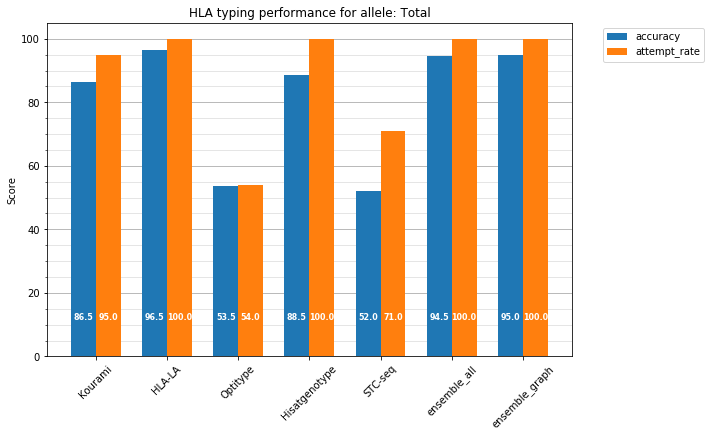

In [45]:
make_plot_from_allele_list('Total')

## HLA-I and HLA-II

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec2ed5e80>)

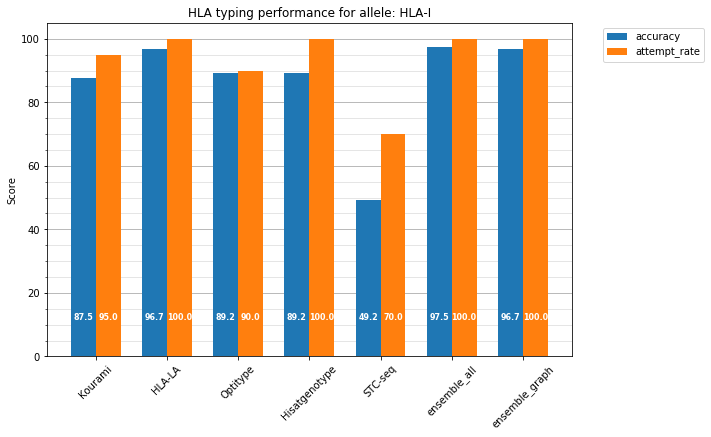

In [46]:
make_plot_from_allele_list('HLA-I')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec2ed5470>)

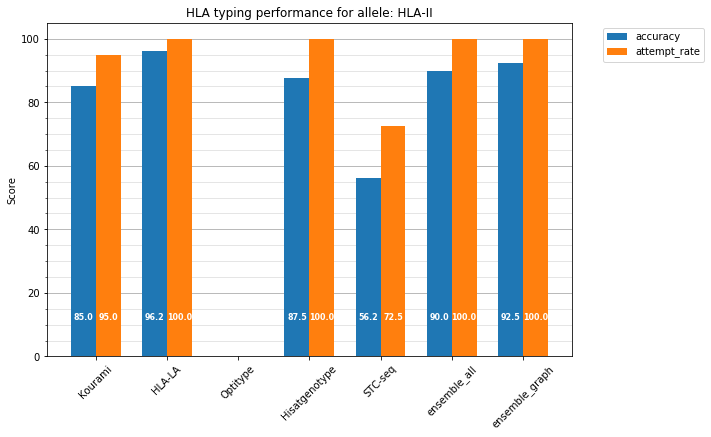

In [47]:
make_plot_from_allele_list('HLA-II')

## Individual Alleles

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec30140b8>)

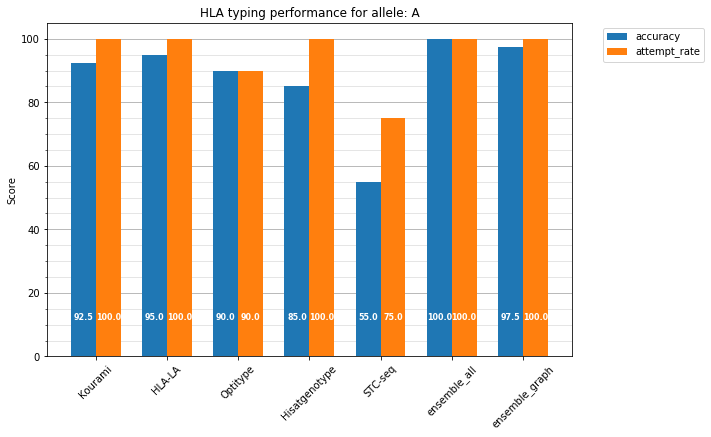

In [48]:
make_plot_from_allele_list('A')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec3254400>)

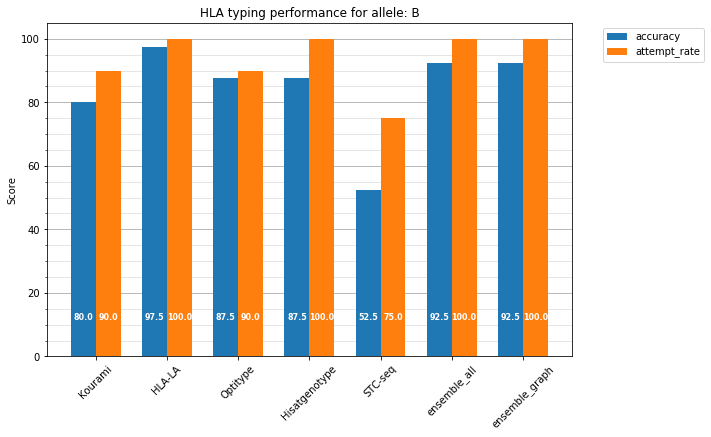

In [49]:
make_plot_from_allele_list('B')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec326a710>)

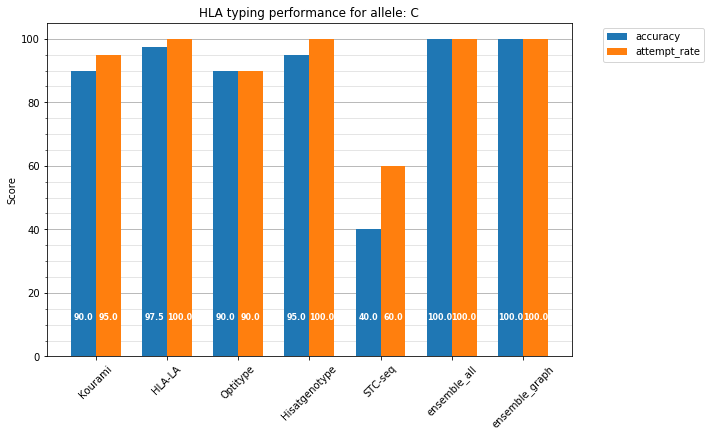

In [50]:
make_plot_from_allele_list('C')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec3692390>)

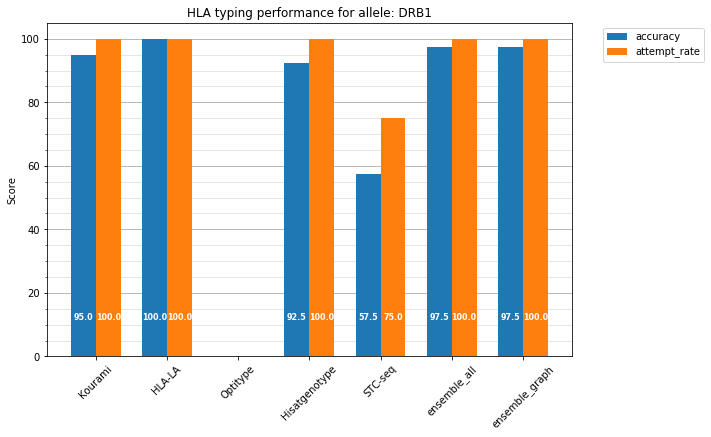

In [51]:
make_plot_from_allele_list('DRB1')

(<module 'matplotlib.pyplot' from 'C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dec37580b8>)

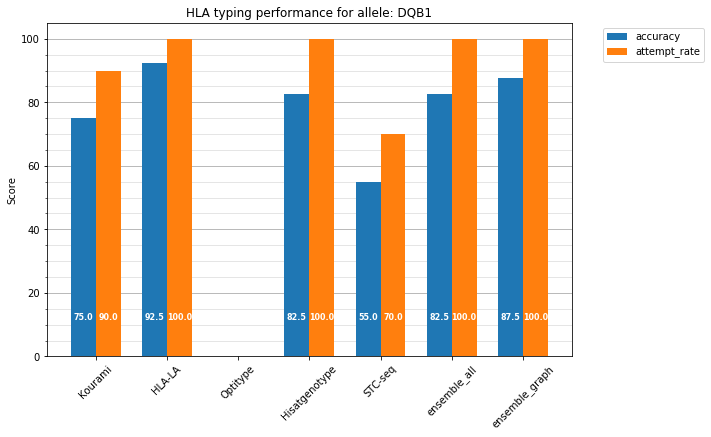

In [52]:
make_plot_from_allele_list('DQB1')